In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('/content/cleaned_merged.csv')

In [9]:
df

,Unnamed: 0,Date,Town,State/Province,Latitude,Longitude,seasonal
0,0,12/31/18,Homer City,PA,40.5,-79.2,fall
1,1,12/30/18,Edisto Island,SC,32.5,-80.3,fall
2,2,12/30/18,Crawfordville,FL,30.1,-84.3,fall
3,3,12/29/18,Edisto Island,SC,32.6,-80.3,fall
4,4,12/28/18,Nags Head,NC,35.8,-75.6,fall
...,...,...,...,...,...,...,...
111047,112867,1/1/17,Pacific Grove,CA,36.6,-121.9,spring
111048,112868,1/1/17,Morro Bay,CA,35.4,-120.8,spring
111049,112869,1/1/17,Santa Cruz,CA,37.1,-122.2,spring
111050,112870,1/1/17,Alder Rd vortex,CA,37.9,-122.7,spring


In [11]:
# prompt: drop the unmaed column, make the date colum a datetime column, put it in ascending order, then put the seasonal column into 1 and 0.

import pandas as pd
# Drop unnamed column (if it exists)
if 'Unnamed: 0' in df.columns:
  df = df.drop('Unnamed: 0', axis=1)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date in ascending order
df = df.sort_values('Date')

# Convert 'Seasonal' column to 1 and 0 (assuming 'Yes' represents 1 and 'No' represents 0)
df['seasonal'] = df['seasonal'].map({'spring': 1, 'fall': 0})

# Display the updated DataFrame
df


,Date,Town,State/Province,Latitude,Longitude,seasonal
111051,2017-01-01,Arroyo Grande,CA,35.1,-120.6,1
111047,2017-01-01,Pacific Grove,CA,36.6,-121.9,1
111046,2017-01-01,Pismo Beach,CA,35.2,-120.7,1
111045,2017-01-01,Big Sur,CA,36.2,-121.6,1
111044,2017-01-01,New Orleans,LA,30.0,-90.1,1
...,...,...,...,...,...,...
32532,2024-10-05,Port Dickinson,NY,42.1,-75.9,0
32531,2024-10-05,Binghamton,NY,42.1,-75.9,0
32538,2024-10-05,Edmond,OK,35.7,-97.5,0
32552,2024-10-05,Two Harbors,MN,47.0,-91.7,0


In [12]:
# prompt: now I want to know the top 30 towns.

top_30_towns = df.groupby('Town')['Town'].count().sort_values(ascending=False).head(30)
print(top_30_towns)


Town
Minneapolis        1609
Tulsa              1409
Houston            1042
Toronto             792
Dallas              727
Austin              705
San Antonio         633
Oklahoma City       623
Madison             598
Harrisville         522
Saint Paul          475
Chicago             473
Edmond              448
Plano               442
Newburgh            440
Burlington          404
Louisville          392
Corpus Christi      390
Lusby               377
Palmarejo           371
Hammond             368
West Palm Beach     360
Chatham-Kent        358
Cincinnati          346
Annapolis           342
Norman              334
Georgetown          333
Broken Arrow        332
Allenton            328
Saint Louis         314
Name: Town, dtype: int64


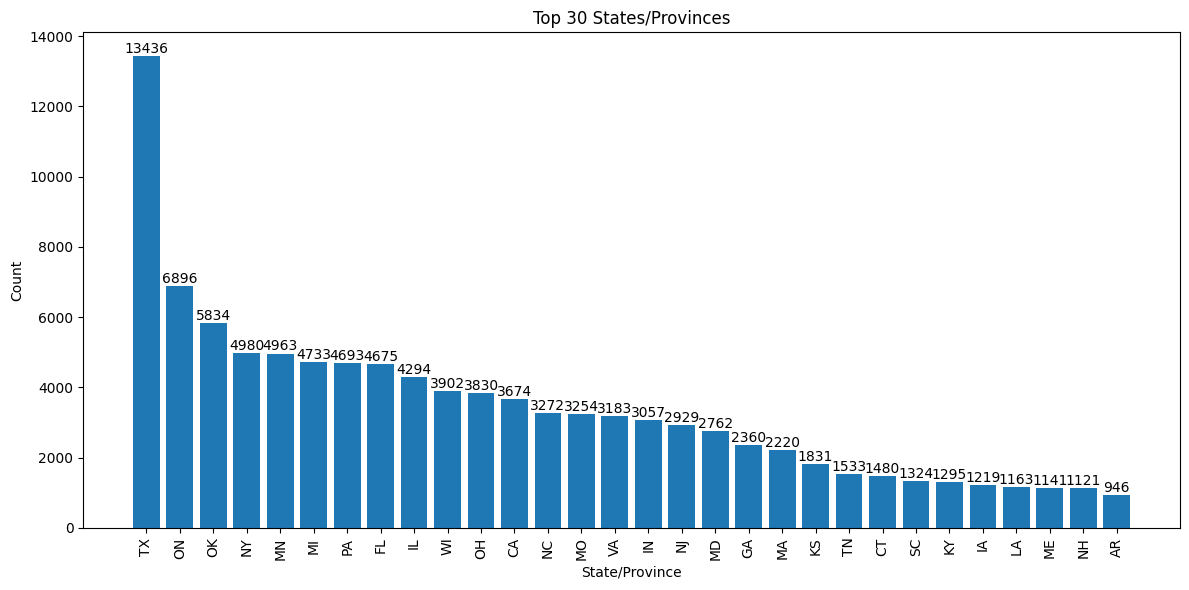

In [17]:
# prompt: now i want the top 30 states in a barplot
# . use df['State/Province'] i also want the numbers too of the counts in the plot

import matplotlib.pyplot as plt

# Group by state and count occurrences
state_counts = df.groupby('State/Province')['State/Province'].count().sort_values(ascending=False).head(30)

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(state_counts.index, state_counts.values)
plt.xlabel('State/Province')
plt.ylabel('Count')
plt.title('Top 30 States/Provinces')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Add the count values above the bars
for i, v in enumerate(state_counts.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')  # Adjust positioning as needed

plt.tight_layout()  # Prevent labels from overlapping
plt.show()


In [20]:
# prompt: now show me the top 50 cities on top of the top 10 states but do a stacked barchat to display that.  give the top 50 state their respective names. use plotly so that it is interactive. also make sure to give me

import pandas as pd
import plotly.express as px

# Assuming 'df' is your DataFrame and it has 'State/Province' and 'Town' columns

# Group by state and town, then count occurrences
state_town_counts = df.groupby(['State/Province', 'Town'])['Town'].count().sort_values(ascending=False)

# Get the top 10 states
top_10_states = state_town_counts.groupby('State/Province').sum().sort_values(ascending=False).head(10).index.tolist()

# Filter the data to include only the top 10 states
filtered_df = df[df['State/Province'].isin(top_10_states)]

# Get the top 50 towns within the top 10 states
top_50_towns = filtered_df.groupby('Town')['Town'].count().sort_values(ascending=False).head(50).index.tolist()

# Filter the data to include only the top 50 towns within the top 10 states
filtered_df = filtered_df[filtered_df['Town'].isin(top_50_towns)]

# Group by state and town, then count occurrences for the filtered data
state_town_counts = filtered_df.groupby(['State/Province', 'Town'])['Town'].count().unstack().fillna(0)

# Create the stacked bar chart using Plotly Express
fig = px.bar(state_town_counts,
             barmode='stack',
             title='Top 50 Towns in Top 10 States',
             labels={'value': 'Count', 'variable': 'Town'},
             width=1000,  # Adjust width as needed
             height=600  # Adjust height as needed
             )

fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for better readability

fig.show()


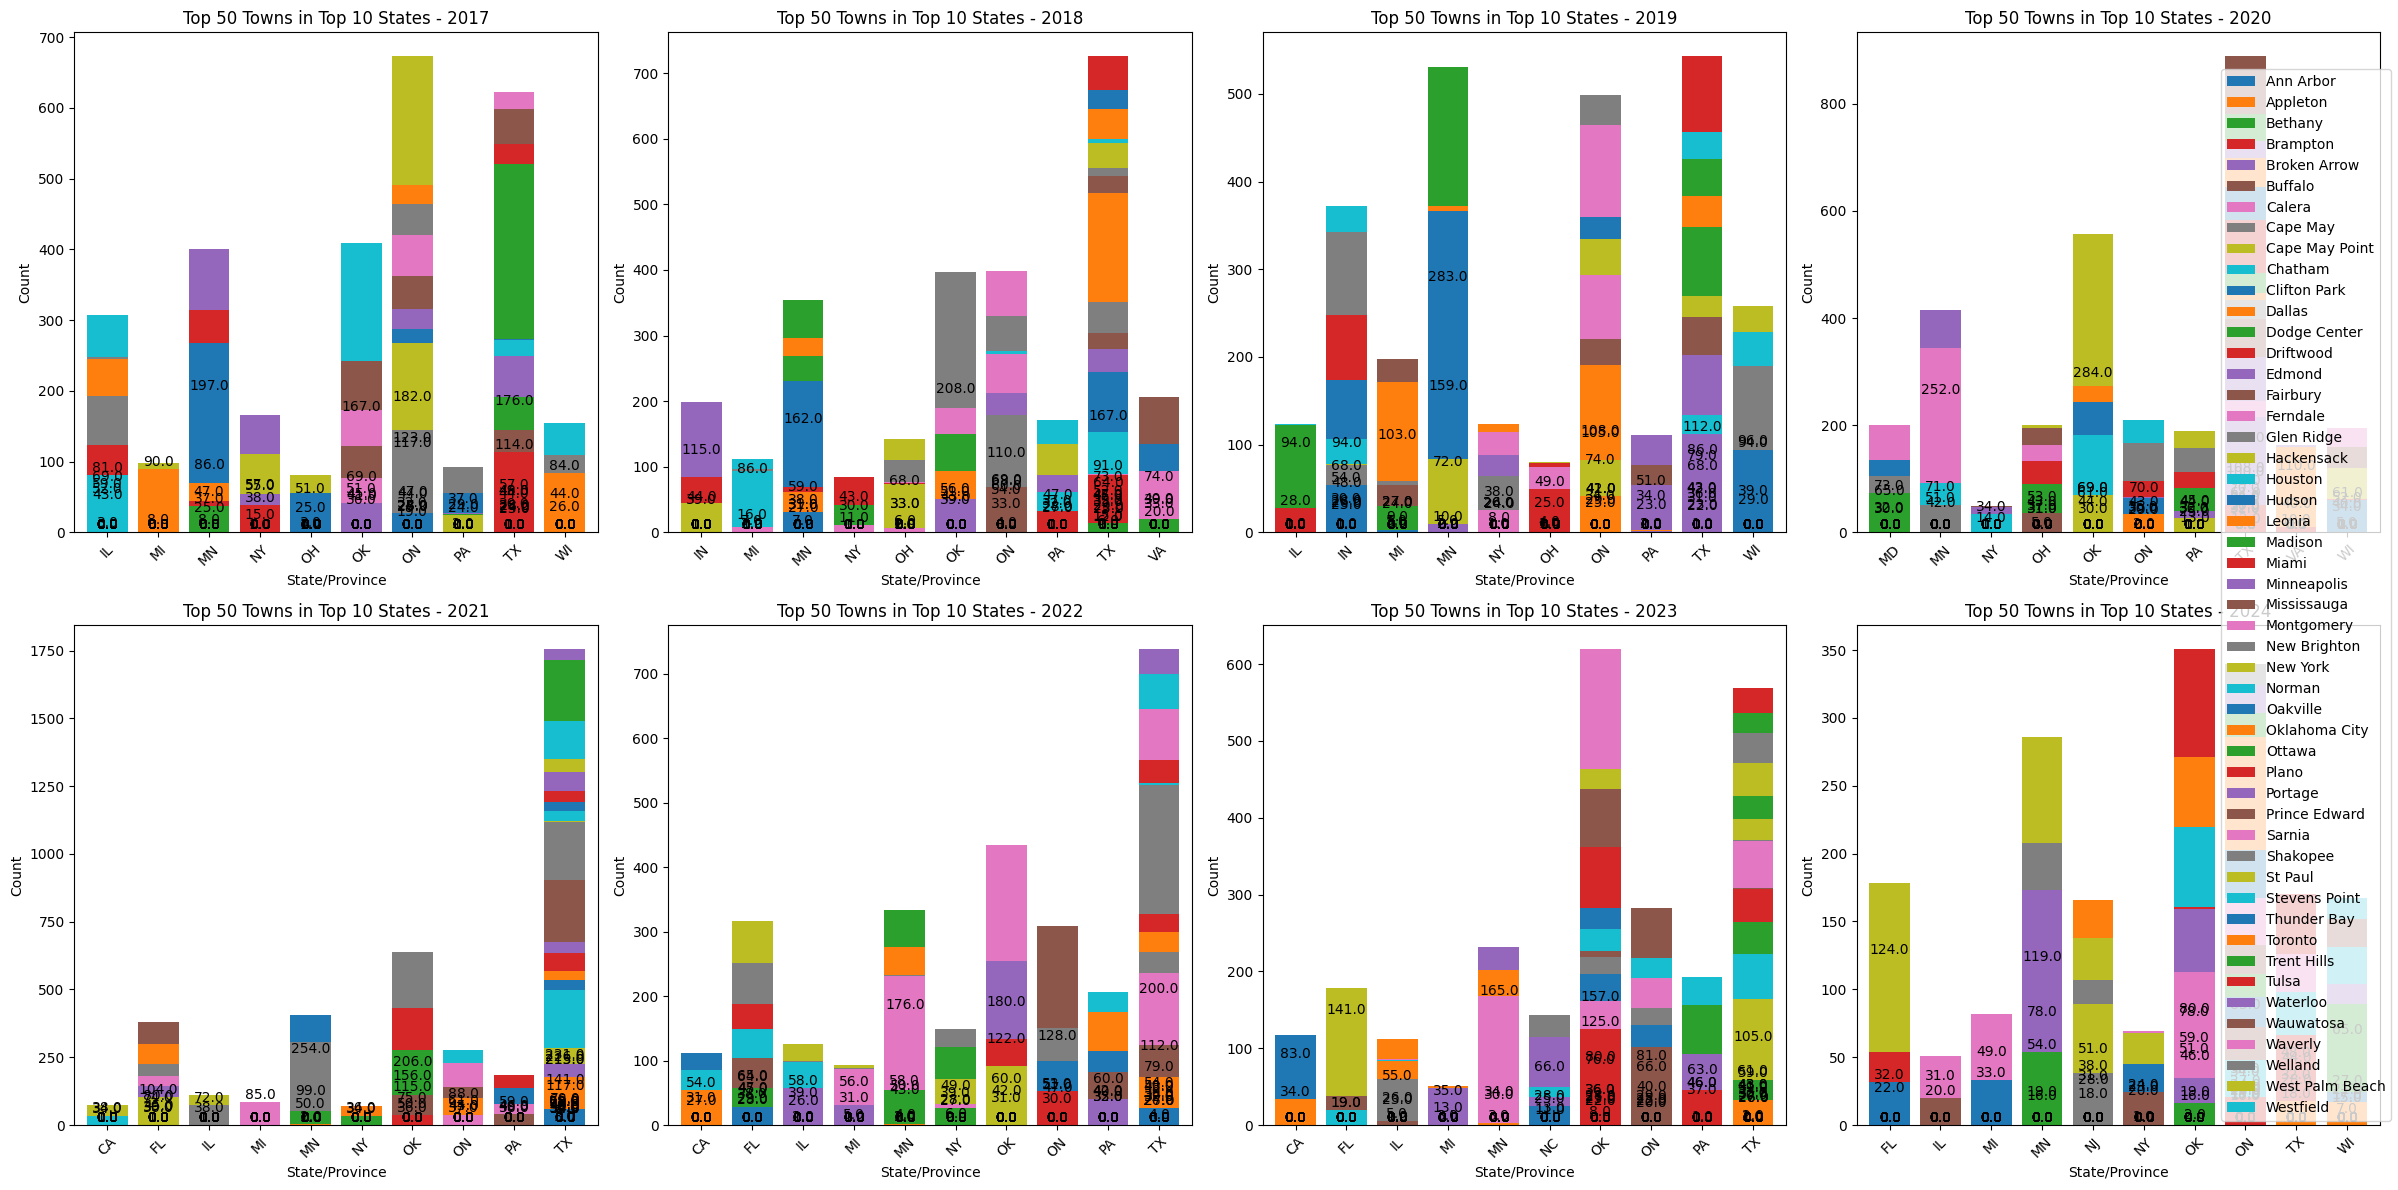

In [24]:
# prompt: now show me the top 50 cities on top of the top 10 states but do a stacked barchat to display that.  give the top 50 state their respective names. i want different plots for each year from 2017-2024. Put a big figure size. no i want subplots. just give me 1 legend. Also on top of each state display the total counts too.

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Assuming 'df' is your DataFrame and it has 'State/Province', 'Town', and 'Date' columns

# Filter data for years 2017-2024
df_filtered = df[(df['Date'].dt.year >= 2017) & (df['Date'].dt.year <= 2024)]

# Create a figure with subplots for each year
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 12))  # Adjust figsize as needed
axes = axes.flatten()

for year, ax in zip(range(2017, 2025), axes):
    # Filter data for the current year
    df_year = df_filtered[df_filtered['Date'].dt.year == year]

    # Group by state and town, then count occurrences
    state_town_counts = df_year.groupby(['State/Province', 'Town'])['Town'].count().sort_values(ascending=False)

    # Get the top 10 states
    top_10_states = state_town_counts.groupby('State/Province').sum().sort_values(ascending=False).head(10).index.tolist()

    # Filter the data to include only the top 10 states
    filtered_df = df_year[df_year['State/Province'].isin(top_10_states)]

    # Get the top 50 towns within the top 10 states
    top_50_towns = filtered_df.groupby('Town')['Town'].count().sort_values(ascending=False).head(50).index.tolist()

    # Filter the data to include only the top 50 towns within the top 10 states
    filtered_df = filtered_df[filtered_df['Town'].isin(top_50_towns)]

    # Group by state and town, then count occurrences for the filtered data
    state_town_counts = filtered_df.groupby(['State/Province', 'Town'])['Town'].count().unstack().fillna(0)

    # Create the stacked bar chart
    state_town_counts.plot(kind='bar', stacked=True, ax=ax, legend=False, width=0.8)

    # Add total counts on top of each bar
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

    ax.set_title(f'Top 50 Towns in Top 10 States - {year}')
    ax.set_xlabel('State/Province')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability


# Add a single legend for the entire figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')

plt.tight_layout()  # Prevent overlapping
plt.show()



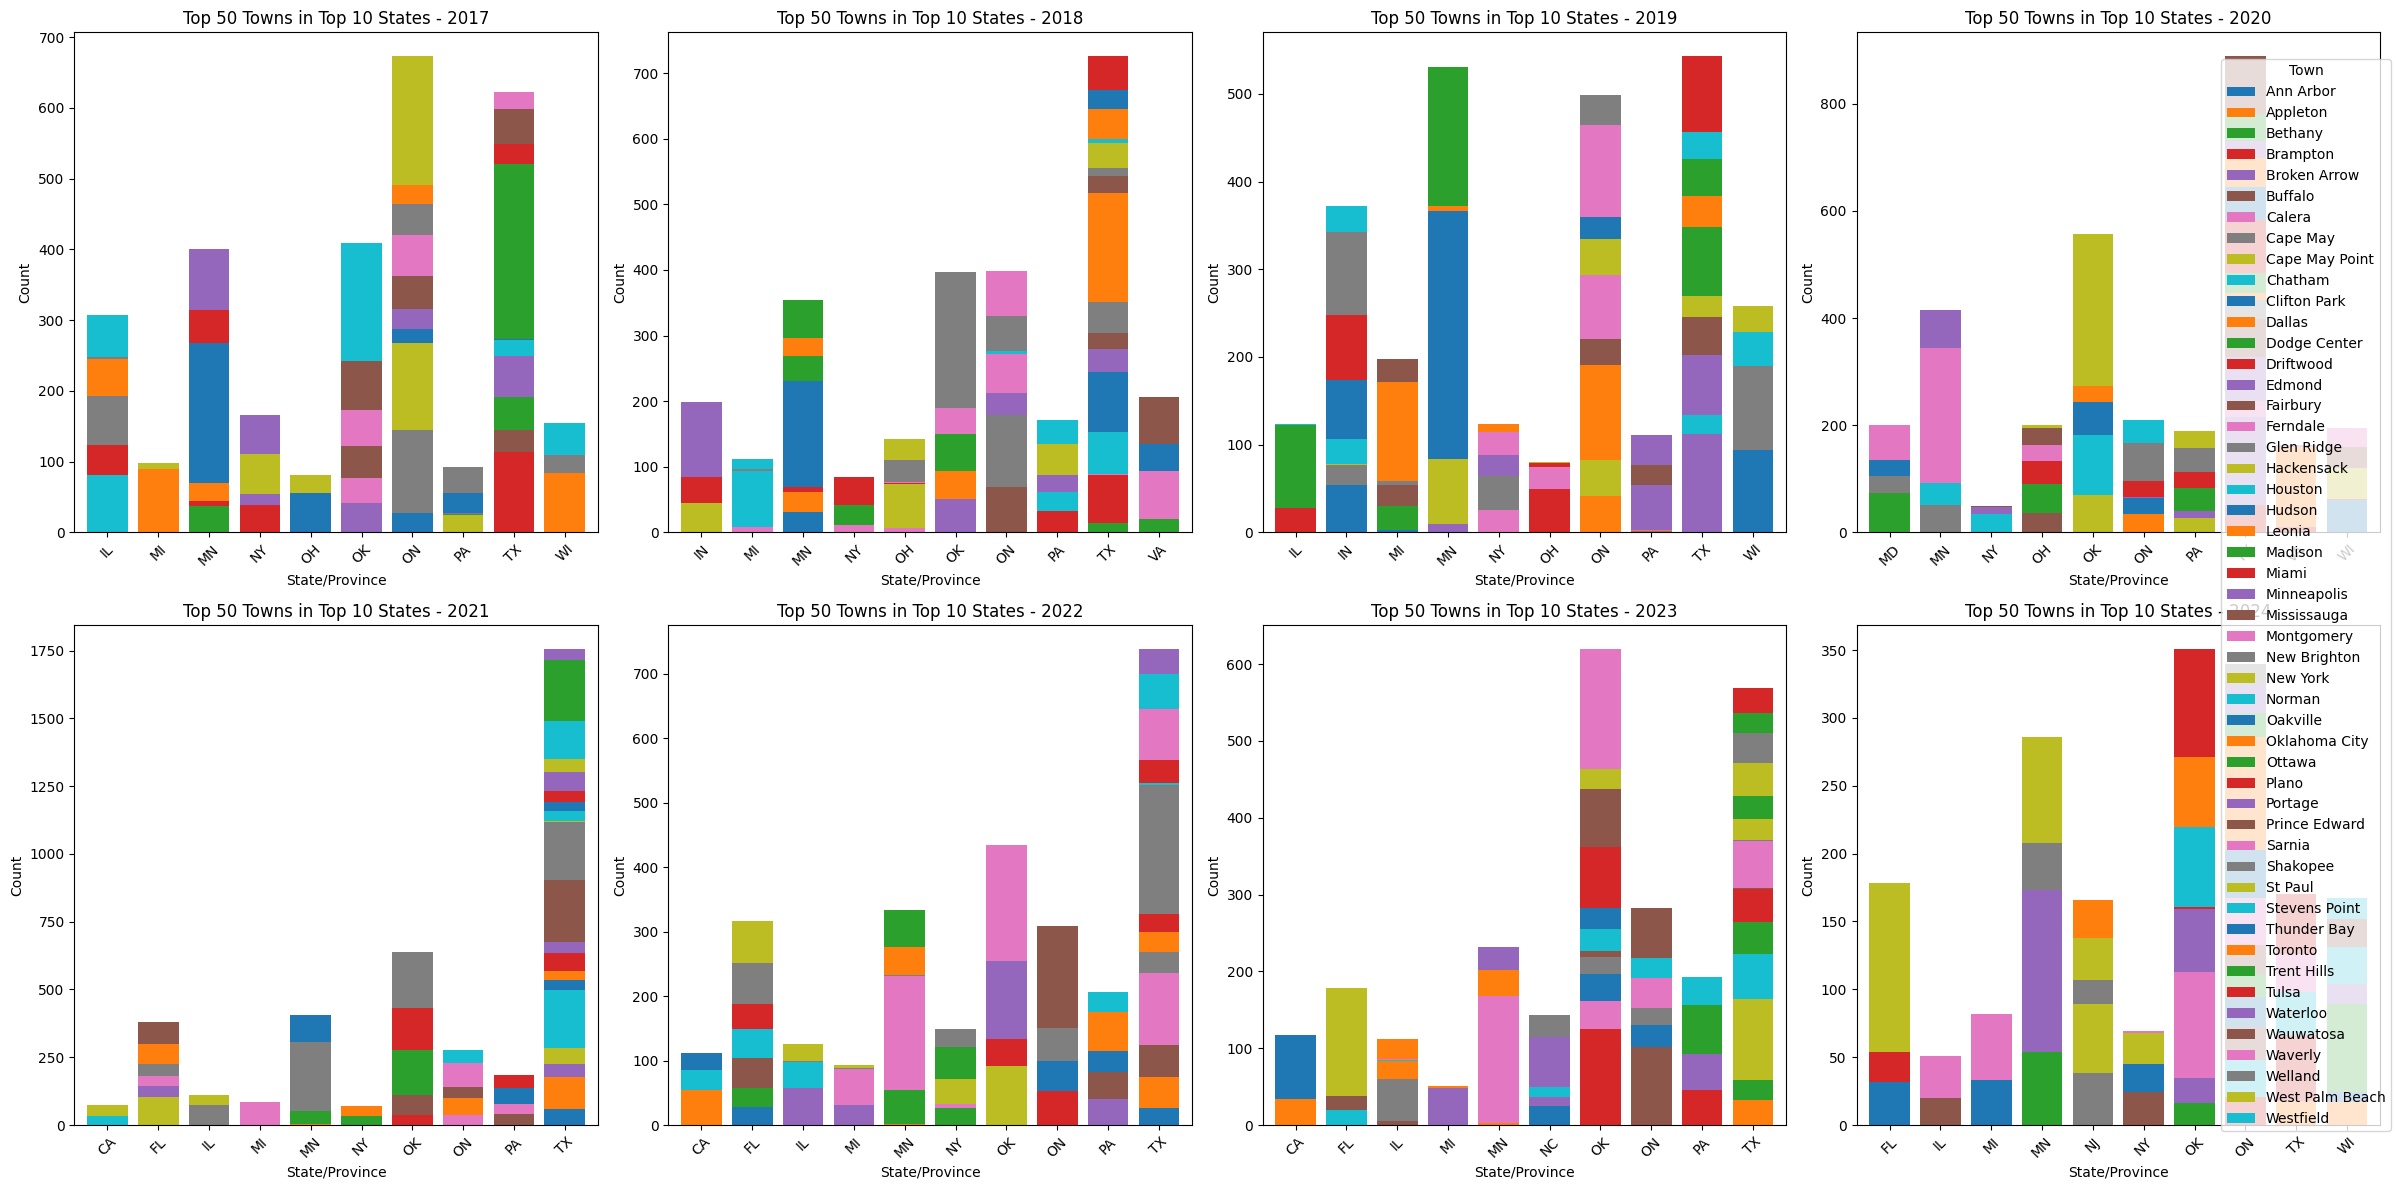

In [26]:
# prompt: now show me the top 50 cities on top of the top 10 states but do a stacked barchat to display that.  give the top 50 state their respective names. i want different plots for each year from 2017-2024. Put a big figure size. no i want subplots. just give me 1 legend. Make it cleaner.

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has 'State/Province', 'Town', and 'Date' columns

# Filter data for years 2017-2024
df_filtered = df[(df['Date'].dt.year >= 2017) & (df['Date'].dt.year <= 2024)]

# Create a figure with subplots for each year
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 12))  # Adjust figsize as needed
axes = axes.flatten()

for year, ax in zip(range(2017, 2025), axes):
    # Filter data for the current year
    df_year = df_filtered[df_filtered['Date'].dt.year == year]

    # Group by state and town, then count occurrences
    state_town_counts = df_year.groupby(['State/Province', 'Town'])['Town'].count().sort_values(ascending=False)

    # Get the top 10 states
    top_10_states = state_town_counts.groupby('State/Province').sum().sort_values(ascending=False).head(10).index.tolist()

    # Filter the data to include only the top 10 states
    filtered_df = df_year[df_year['State/Province'].isin(top_10_states)]

    # Get the top 50 towns within the top 10 states
    top_50_towns = filtered_df.groupby('Town')['Town'].count().sort_values(ascending=False).head(50).index.tolist()

    # Filter the data to include only the top 50 towns within the top 10 states
    filtered_df = filtered_df[filtered_df['Town'].isin(top_50_towns)]

    # Group by state and town, then count occurrences for the filtered data
    state_town_counts = filtered_df.groupby(['State/Province', 'Town'])['Town'].count().unstack().fillna(0)

    # Create the stacked bar chart
    state_town_counts.plot(kind='bar', stacked=True, ax=ax, legend=False, width=0.8)

    ax.set_title(f'Top 50 Towns in Top 10 States - {year}')
    ax.set_xlabel('State/Province')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Add a single legend for the entire figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', title='Town')

plt.tight_layout()  # Prevent overlapping
plt.show()


In [46]:
# prompt: ok now I want to take the states and show the no of observation of the top states year each year from 2017-2024. I want them in a table

# Filter data for years 2017-2024
df_filtered = df[(df['Date'].dt.year >= 2017) & (df['Date'].dt.year <= 2024)]

# Group by year and state, then count occurrences
year_state_counts = df_filtered.groupby([df_filtered['Date'].dt.year, 'State/Province'])['State/Province'].count().unstack().fillna(0)

# Get the top 10 states overall
top_10_states = df.groupby('State/Province')['State/Province'].count().sort_values(ascending=False).head(10).index.tolist()

# Filter the table to only include the top 10 states
year_state_counts = year_state_counts[top_10_states]

# Display the table
year_state_counts


State/Province,TX,ON,OK,NY,MN,MI,PA,FL,IL,WI
Date,,,,,,,,,,
2017,1521.0,1376.0,610.0,804.0,713.0,532.0,647.0,363.0,628.0,487.0
2018,1768.0,890.0,695.0,672.0,618.0,653.0,647.0,262.0,550.0,413.0
2019,1235.0,982.0,486.0,678.0,721.0,727.0,596.0,305.0,522.0,622.0
2020,1982.0,585.0,887.0,553.0,550.0,394.0,560.0,360.0,401.0,530.0
2021,3356.0,746.0,993.0,702.0,567.0,701.0,819.0,1545.0,657.0,501.0
2022,1777.0,911.0,773.0,758.0,703.0,662.0,608.0,920.0,704.0,545.0
2023,1262.0,691.0,814.0,401.0,547.0,547.0,575.0,520.0,552.0,406.0
2024,535.0,715.0,576.0,412.0,544.0,517.0,241.0,400.0,280.0,398.0


In [54]:
# prompt:  now i want the top 10 state in a list.

# Assuming 'df' is your DataFrame and it has 'State/Province' column

# Group by state and count occurrences
state_counts = df.groupby('State/Province')['State/Province'].count()

# Sort in descending order and get the top 10 states
top_10_states = state_counts.sort_values(ascending=False).head(10).index.tolist()

# Print the list of top 10 states
print(top_10_states)


['TX', 'ON', 'OK', 'NY', 'MN', 'MI', 'PA', 'FL', 'IL', 'WI']


In [48]:
# prompt: ok now subset the data of the top 10 states into a new df and print its shape, describe it.

# Group by state and count occurrences to find the top 10 states
top_10_states = df.groupby('State/Province')['State/Province'].count().sort_values(ascending=False).head(10).index.tolist()

# Subset the data to include only the top 10 states
df_top_10_states = df[df['State/Province'].isin(top_10_states)]

# Print the shape of the new DataFrame
print("Shape of the DataFrame with top 10 states:", df_top_10_states.shape)

# Describe the new DataFrame
print("\nDescriptive statistics of the DataFrame with top 10 states:")
df_top_10_states.describe()


Shape of the DataFrame with top 10 states: (58406, 7)

Descriptive statistics of the DataFrame with top 10 states:


,Date,Latitude,Longitude,seasonal,Year
count,58406,58406.000000,58406.000000,58406.000000,58406.000000
mean,2020-12-24 21:31:05.027565568,38.257129,-87.857307,0.290758,2020.350529
min,2017-01-01 00:00:00,19.600000,-118.700000,0.000000,2017.000000
25%,2018-11-03 00:00:00,32.700000,-95.900000,0.000000,2018.000000
50%,2021-04-02 00:00:00,40.800000,-88.200000,0.000000,2021.000000
75%,2022-08-28 00:00:00,43.200000,-80.200000,1.000000,2022.000000
max,2024-10-05 00:00:00,51.200000,-71.900000,1.000000,2024.000000
std,NaN,6.036696,8.192077,0.454116,2.159042


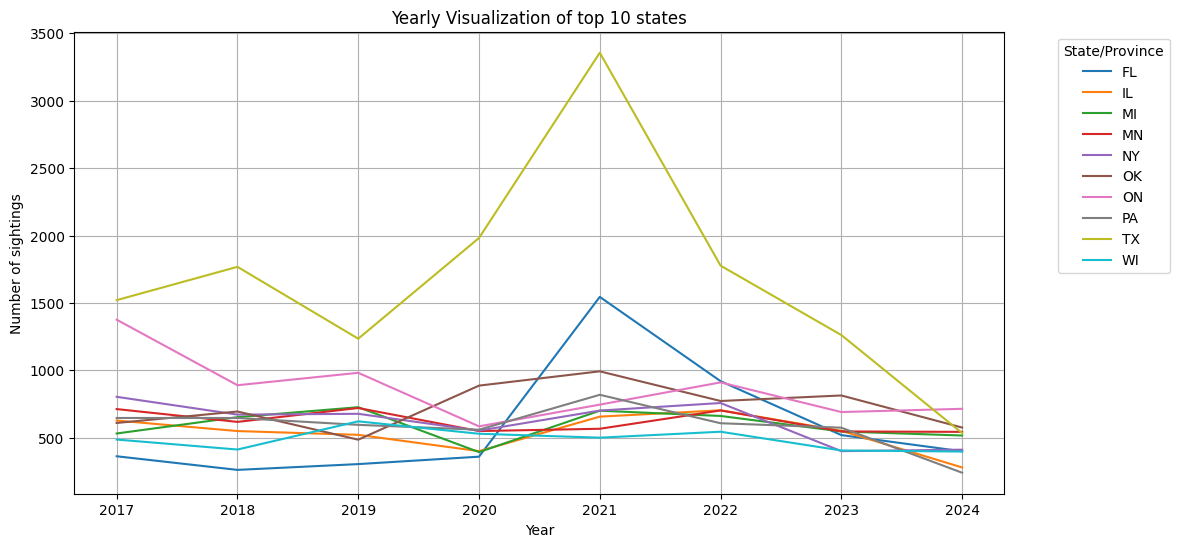

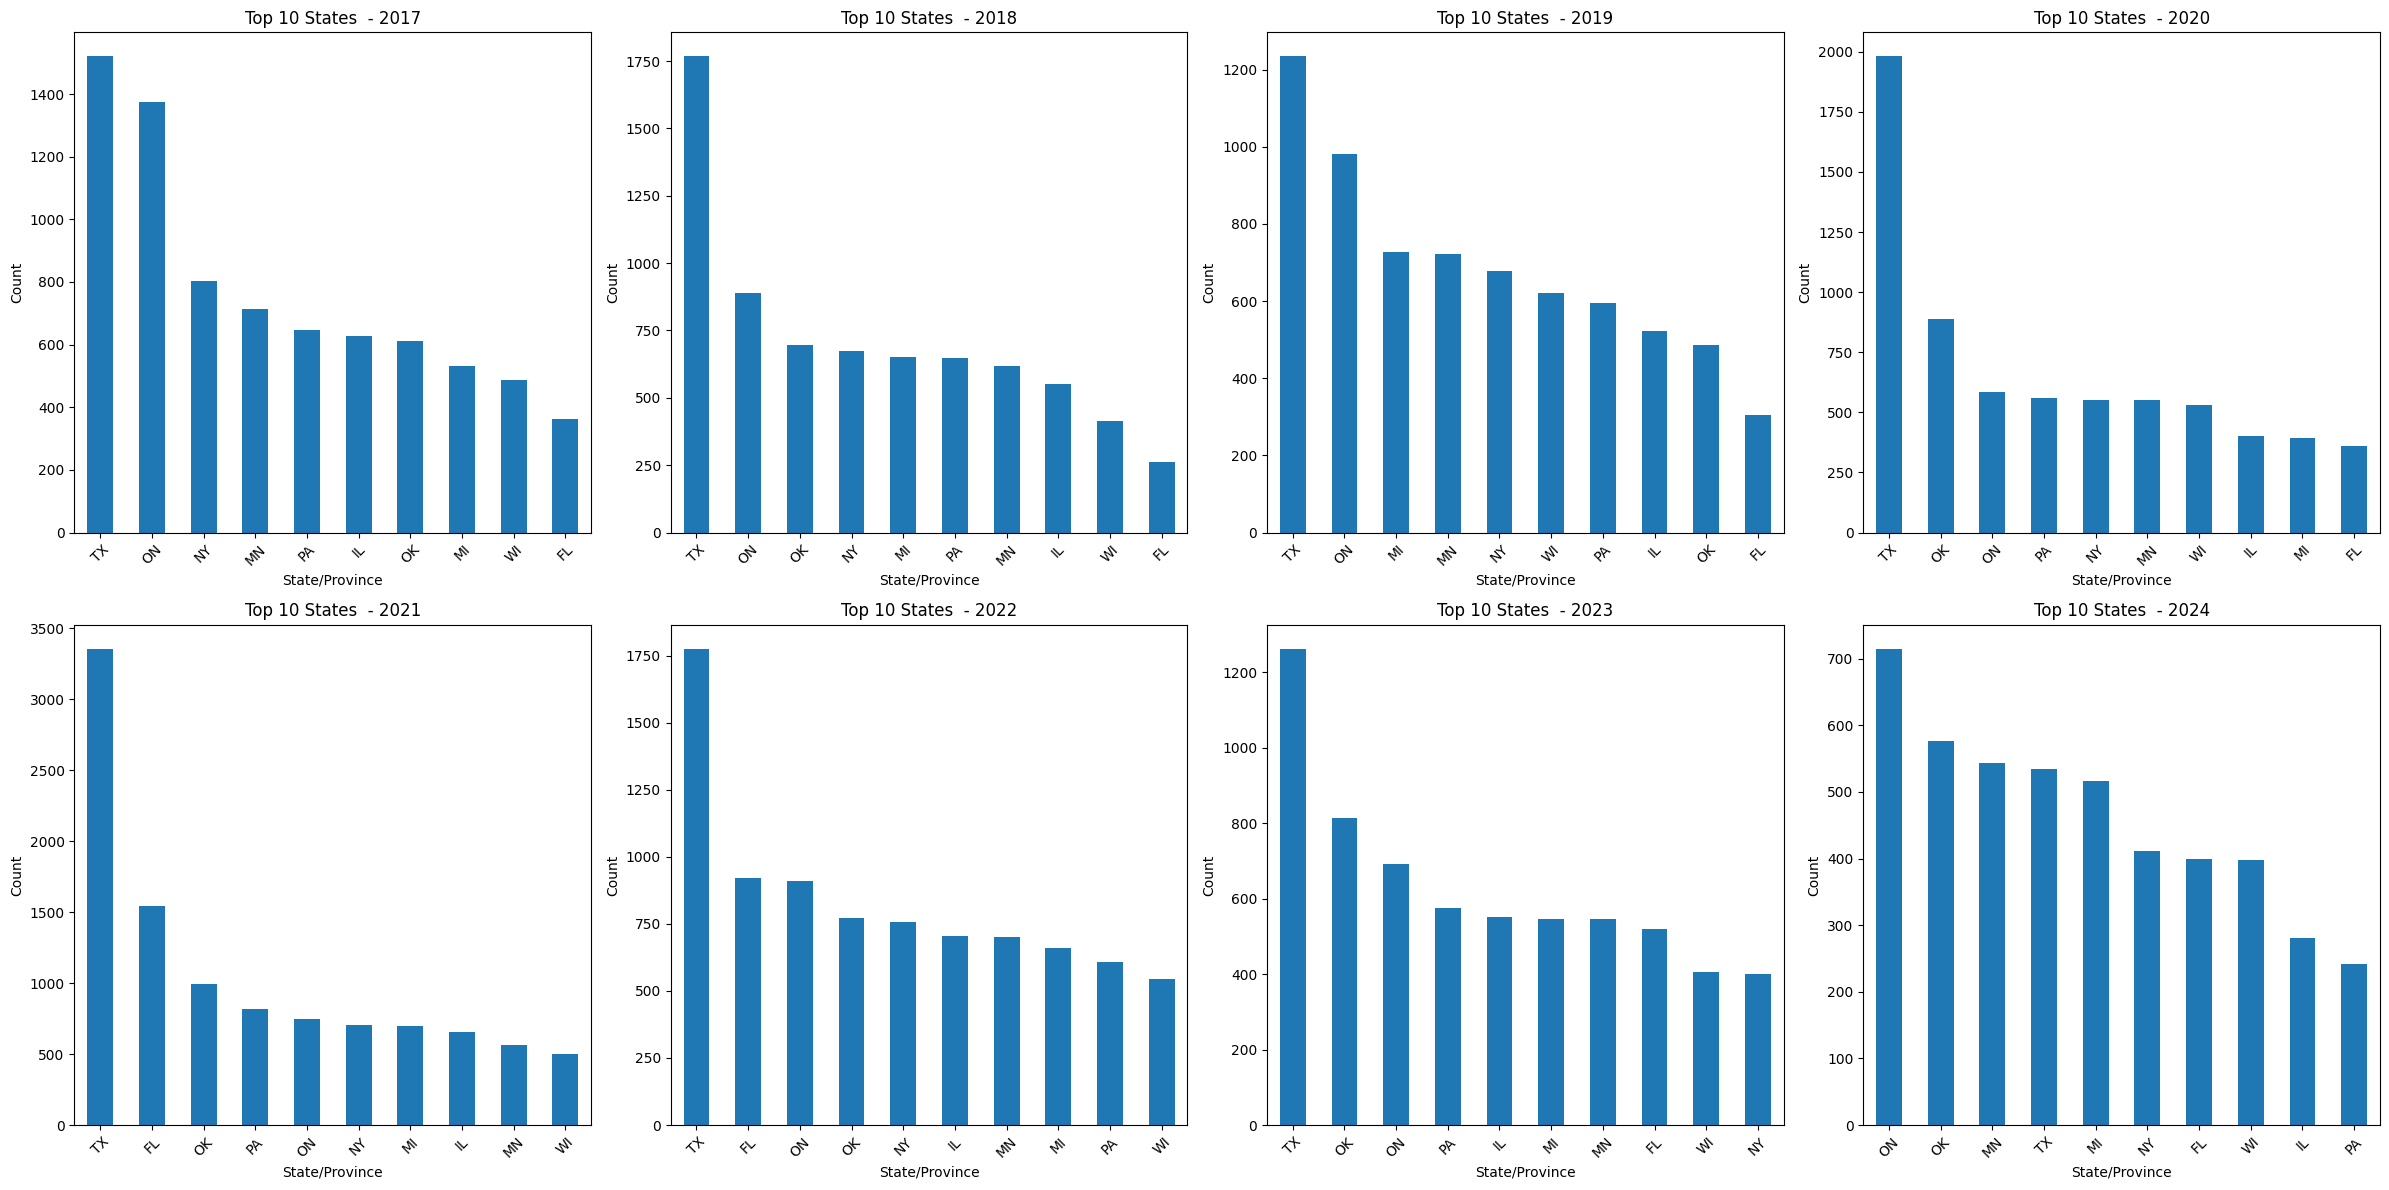

In [50]:
# prompt: i want charts to show yearly visualization in the new dataset.

import matplotlib.pyplot as plt

# Filter data for years 2017-2024
df_filtered = df_top_10_states[(df_top_10_states['Date'].dt.year >= 2017) & (df_top_10_states['Date'].dt.year <= 2024)]

# Group by year and state, then count occurrences
year_state_counts = df_filtered.groupby([df_filtered['Date'].dt.year, 'State/Province'])['State/Province'].count().unstack().fillna(0)

# Plot the yearly visualization for each state
ax = year_state_counts.plot(kind='line', figsize=(12, 6))
plt.title('Yearly Visualization of top 10 states')
plt.xlabel('Year')
plt.ylabel('Number of sightings')
plt.legend(title='State/Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


# Create a figure with subplots for each year
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 12))
axes = axes.flatten()

for year, ax in zip(range(2017, 2025), axes):
    # Filter data for the current year
    df_year = df_filtered[df_filtered['Date'].dt.year == year]

    # Group by state and count occurrences
    state_counts = df_year.groupby('State/Province')['State/Province'].count().sort_values(ascending=False)

    # Create the bar chart
    state_counts.plot(kind='bar', ax=ax)

    ax.set_title(f'Top 10 States  - {year}')
    ax.set_xlabel('State/Province')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Prevent overlapping
plt.show()


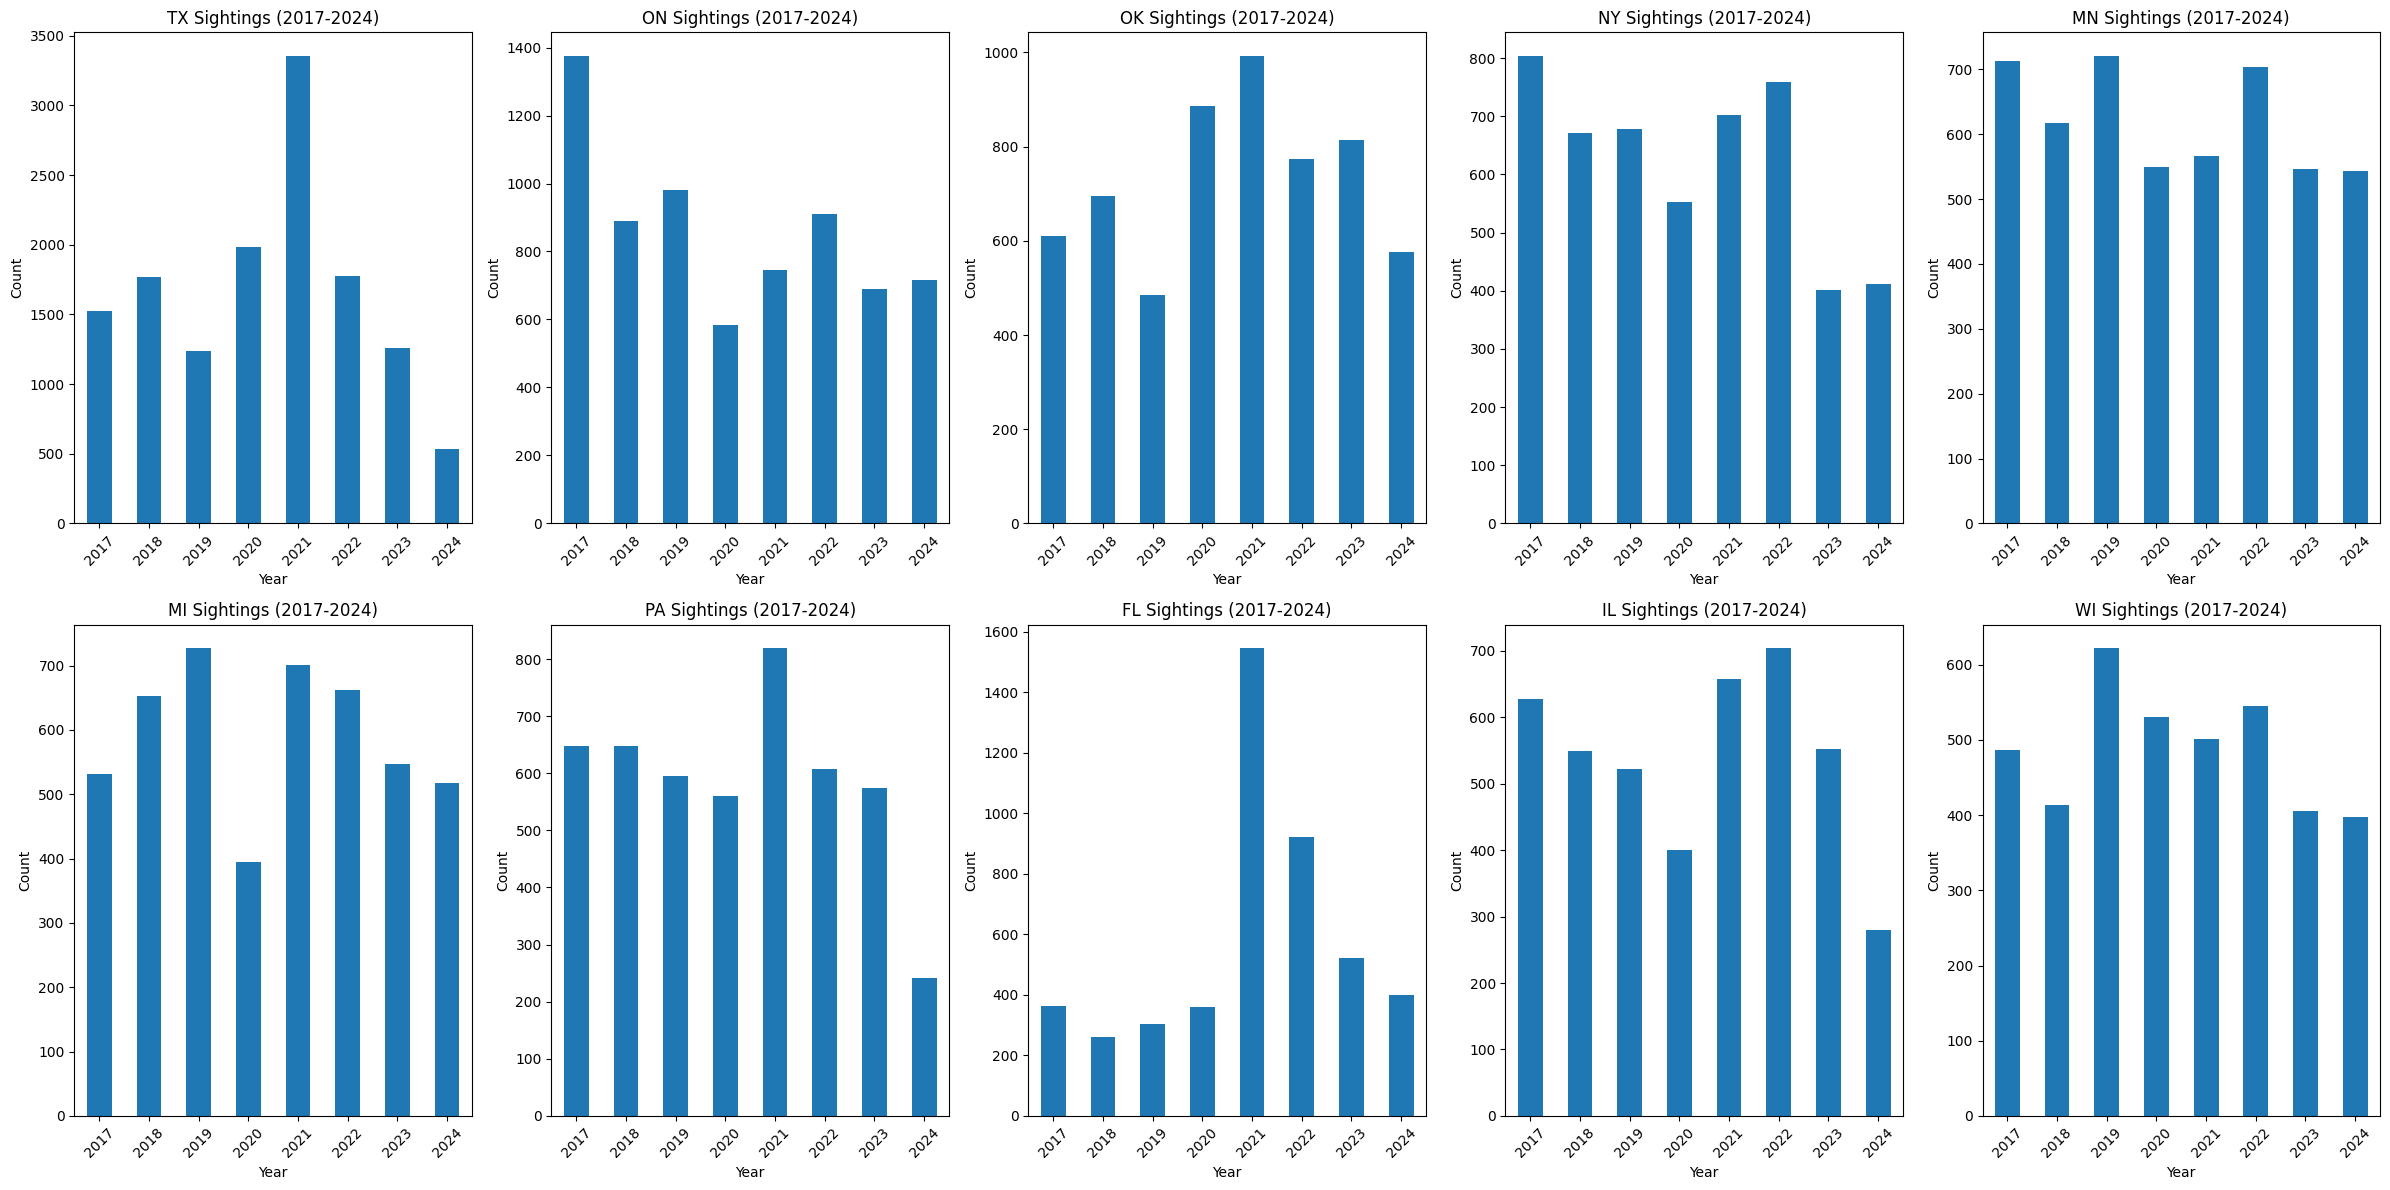

In [51]:
# prompt: give me data of each state year by year. for eg texas from 2017-2024 in bar chart. for all 10 states

import matplotlib.pyplot as plt

# Group by state and count occurrences to find the top 10 states
top_10_states = df.groupby('State/Province')['State/Province'].count().sort_values(ascending=False).head(10).index.tolist()

# Subset the data to include only the top 10 states
df_top_10_states = df[df['State/Province'].isin(top_10_states)]

# Filter data for years 2017-2024
df_filtered = df_top_10_states[(df_top_10_states['Date'].dt.year >= 2017) & (df_top_10_states['Date'].dt.year <= 2024)]

# Create a figure with subplots for each state
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(24, 12))
axes = axes.flatten()

for state, ax in zip(top_10_states, axes):
  # Filter data for the current state
  df_state = df_filtered[df_filtered['State/Province'] == state]

  # Group by year and count occurrences
  year_counts = df_state.groupby(df_state['Date'].dt.year)['Date'].count()

  # Create the bar chart
  year_counts.plot(kind='bar', ax=ax)

  ax.set_title(f'{state} Sightings (2017-2024)')
  ax.set_xlabel('Year')
  ax.set_ylabel('Count')
  ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Prevent overlapping
plt.show()


In [139]:
df_top_10_states.shape

(58406, 7)

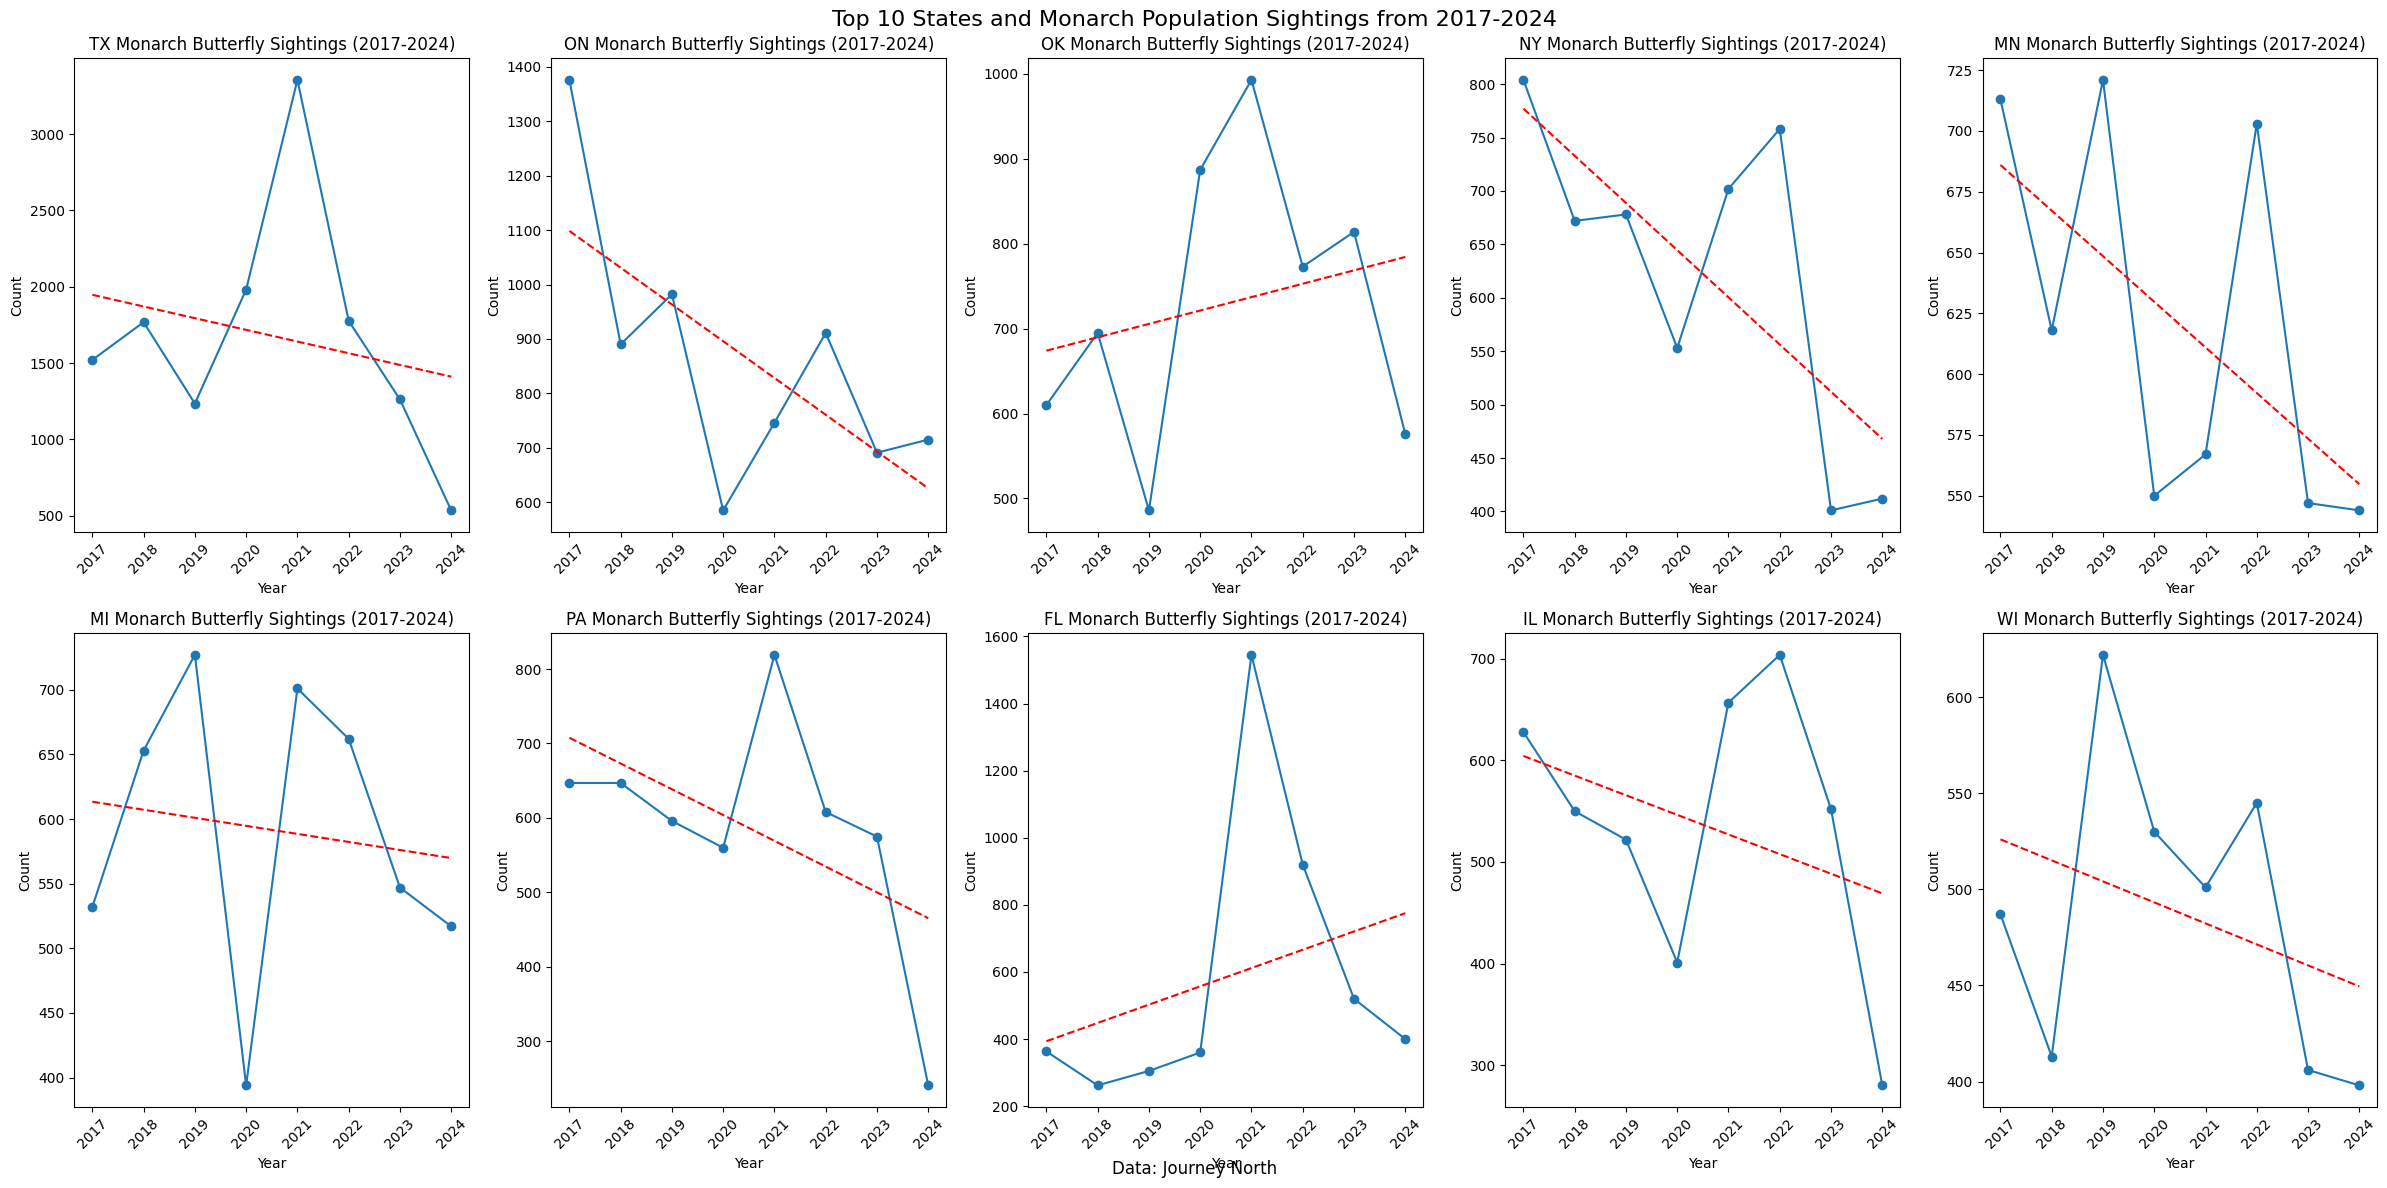

In [57]:
# prompt: now i want to see a rate of change of each state over 2017-2024 using a Line Plot with Slopes. one chart per state.  Give it a label too. "Top 10 States and Monarch Population Sightings from 2017-2024 ". Also add a source ( Data: Journey North)

import matplotlib.pyplot as plt
import numpy as np

# Group by state and count occurrences to find the top 10 states
top_10_states = df.groupby('State/Province')['State/Province'].count().sort_values(ascending=False).head(10).index.tolist()

# Subset the data to include only the top 10 states
df_top_10_states = df[df['State/Province'].isin(top_10_states)]

# Filter data for years 2017-2024
df_filtered = df_top_10_states[(df_top_10_states['Date'].dt.year >= 2017) & (df_top_10_states['Date'].dt.year <= 2024)]

# Create a figure with subplots for each state
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(24, 12))
axes = axes.flatten()

for state, ax in zip(top_10_states, axes):
  # Filter data for the current state
  df_state = df_filtered[df_filtered['State/Province'] == state]

  # Group by year and count occurrences
  year_counts = df_state.groupby(df_state['Date'].dt.year)['Date'].count()

  # Create the line plot
  ax.plot(year_counts.index, year_counts.values, marker='o')

  # Calculate and plot the slope
  x = np.array(year_counts.index)
  y = np.array(year_counts.values)
  slope, intercept = np.polyfit(x, y, 1)
  ax.plot(x, slope * x + intercept, linestyle='--', color='red')

  ax.set_title(f'{state} Monarch Butterfly Sightings (2017-2024)')
  ax.set_xlabel('Year')
  ax.set_ylabel('Count')
  ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Add a title for the entire figure
fig.suptitle('Top 10 States and Monarch Population Sightings from 2017-2024', fontsize=16)

# Add a source label
plt.figtext(0.5, 0.01, "Data: Journey North", ha="center", fontsize=12)

plt.tight_layout()  # Prevent overlapping
plt.show()


## Pesticide Analysis

In [58]:
data = pd.read_csv('/content/USDA_PDP_AnalyticalResults.csv')

<ipython-input-58-a935c375f751>:1: DtypeWarning:

Columns (9,13) have mixed types. Specify dtype option on import or set low_memory=False.



In [59]:
data

,Sample ID,Commod,Pesticide Code,Pesticide Name,Test Class,Concentration,LOD,pp_,Confirm 1,Confirm 2,Annotate,Quantitate,Mean,Extract,Determ,EPA Tolerance (ppm)
0,CA9401180009APCA1,AP,157,Thiabendazole,B,0.1900,0.030,M,M,NaN,NaN,H,O,NaN,NaN,10
1,CA9401180009APCA1,AP,125,Diphenylamine (DPA),F,1.0000,0.010,M,M,NaN,NaN,H,O,NaN,NaN,10
2,CA9401180084APCA1,AP,125,Diphenylamine (DPA),F,0.1100,0.010,M,M,NaN,NaN,H,O,NaN,NaN,10
3,CA9401180084APCA1,AP,157,Thiabendazole,B,0.0910,0.030,M,M,NaN,NaN,H,O,NaN,NaN,10
4,CA9401180089APCA1,AP,042,Azinphos methyl,C,0.2700,0.020,M,D,M,NaN,M,O,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597500,TX2001130216BNOH1,BN,B48,Azoxystrobin,F,0.0072,0.002,M,LU,NaN,NaN,NaN,O,805,52.0,0.1 EP
597501,TX2006010216BNOH1P,BN,B48,Azoxystrobin,F,0.0033,0.002,M,LU,NaN,Q,NaN,O,805,52.0,0.1 EP
597502,TX2010050108BNOH1P,BN,B48,Azoxystrobin,F,0.0068,0.002,M,LU,NaN,NaN,NaN,O,805,52.0,0.1 EP
597503,TX2006010216BNOH1P,BN,B52,Buprofezin,F,0.0172,0.001,M,LU,NaN,NaN,NaN,O,805,52.0,0.2


In [60]:
# prompt: based on the "Sample ID" column, take the first 2 letters of the "Sample ID" column turn that into a new column called State.

data['State'] = data['Sample ID'].str[:2]


In [61]:
data

,Sample ID,Commod,Pesticide Code,Pesticide Name,Test Class,Concentration,LOD,pp_,Confirm 1,Confirm 2,Annotate,Quantitate,Mean,Extract,Determ,EPA Tolerance (ppm),State
0,CA9401180009APCA1,AP,157,Thiabendazole,B,0.1900,0.030,M,M,NaN,NaN,H,O,NaN,NaN,10,CA
1,CA9401180009APCA1,AP,125,Diphenylamine (DPA),F,1.0000,0.010,M,M,NaN,NaN,H,O,NaN,NaN,10,CA
2,CA9401180084APCA1,AP,125,Diphenylamine (DPA),F,0.1100,0.010,M,M,NaN,NaN,H,O,NaN,NaN,10,CA
3,CA9401180084APCA1,AP,157,Thiabendazole,B,0.0910,0.030,M,M,NaN,NaN,H,O,NaN,NaN,10,CA
4,CA9401180089APCA1,AP,042,Azinphos methyl,C,0.2700,0.020,M,D,M,NaN,M,O,NaN,NaN,2,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597500,TX2001130216BNOH1,BN,B48,Azoxystrobin,F,0.0072,0.002,M,LU,NaN,NaN,NaN,O,805,52.0,0.1 EP,TX
597501,TX2006010216BNOH1P,BN,B48,Azoxystrobin,F,0.0033,0.002,M,LU,NaN,Q,NaN,O,805,52.0,0.1 EP,TX
597502,TX2010050108BNOH1P,BN,B48,Azoxystrobin,F,0.0068,0.002,M,LU,NaN,NaN,NaN,O,805,52.0,0.1 EP,TX
597503,TX2006010216BNOH1P,BN,B52,Buprofezin,F,0.0172,0.001,M,LU,NaN,NaN,NaN,O,805,52.0,0.2,TX


In [62]:
# prompt: show me the different State values and tell me the top 10.

# Get unique state values
unique_states = data['State'].unique()
print("Unique State Values:", unique_states)

# Group by state and count occurrences to find the top 10
top_10_states_data = data.groupby('State')['State'].count().sort_values(ascending=False).head(10)
print("\nTop 10 States:")
print(top_10_states_data)


Unique State Values: ['CA' 'CO' 'FL' 'MI' 'NC' 'NY' 'OH' 'TX' 'WA' 'MO' 'MD' 'WI' 'DE' 'GA'
 'LA' 'MS' 'AL' 'AR' 'TN' 'AZ' 'IA' 'ID' 'IL' 'KS' 'NE' 'PA' 'SC' 'UT'
 'MN' 'SD' 'OR' 'KY' 'OK' 'VA' 'IN' 'ND' 'WV' 'DC' 'MT' 'NJ' 'WY' 'ME'
 'CT' 'NH' 'RI' 'HI' 'MA']

Top 10 States:
State
CA    115795
NY     87906
TX     70695
FL     59176
OH     59068
MI     54065
MD     33822
WA     33364
CO     16216
NC     12887
Name: State, dtype: int64


In [64]:
data.columns

Index(['Sample ID', 'Commod', 'Pesticide Code', 'Pesticide Name', 'Test Class',
       'Concentration', 'LOD', 'pp_', 'Confirm 1', 'Confirm 2', 'Annotate',
       'Quantitate', 'Mean', 'Extract', 'Determ', 'EPA Tolerance (ppm)',
       'State'],
      dtype='object')

In [65]:
data.shape

(597505, 17)

In [66]:
data.dtypes


,0
Sample ID,object
Commod,object
Pesticide Code,object
Pesticide Name,object
Test Class,object
Concentration,float64
LOD,float64
pp_,object
Confirm 1,object
Confirm 2,object


In [67]:
# prompt: In a new dataset I just want to focus on these ten states. [TX    ON    OK    NY    MN    MI    PA    FL    IL    WI]

top_10_states = ['TX', 'ON', 'OK', 'NY', 'MN', 'MI', 'PA', 'FL', 'IL', 'WI']
new_data = data[data['State'].isin(top_10_states)]
new_data


,Sample ID,Commod,Pesticide Code,Pesticide Name,Test Class,Concentration,LOD,pp_,Confirm 1,Confirm 2,Annotate,Quantitate,Mean,Extract,Determ,EPA Tolerance (ppm),State
390,FL9401260001APFL1,AP,042,Azinphos methyl,C,0.0500,0.030,M,D,NaN,Q,M,O,NaN,NaN,2,FL
391,FL9401260001APFL1,AP,157,Thiabendazole,B,4.1000,0.040,M,D,M,NaN,M,O,NaN,NaN,10,FL
392,FL9401260004APUS1,AP,192,Benomyl,B,0.0500,0.050,M,D,NaN,Q,H,O,NaN,NaN,7,FL
393,FL9401260004APFL1,AP,157,Thiabendazole,B,0.4200,0.040,M,D,NaN,NaN,M,O,NaN,NaN,10,FL
394,FL9401260004APFL1,AP,125,Diphenylamine (DPA),F,0.0910,0.010,M,D,M,NaN,M,O,NaN,NaN,10,FL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597500,TX2001130216BNOH1,BN,B48,Azoxystrobin,F,0.0072,0.002,M,LU,NaN,NaN,NaN,O,805,52.0,0.1 EP,TX
597501,TX2006010216BNOH1P,BN,B48,Azoxystrobin,F,0.0033,0.002,M,LU,NaN,Q,NaN,O,805,52.0,0.1 EP,TX
597502,TX2010050108BNOH1P,BN,B48,Azoxystrobin,F,0.0068,0.002,M,LU,NaN,NaN,NaN,O,805,52.0,0.1 EP,TX
597503,TX2006010216BNOH1P,BN,B52,Buprofezin,F,0.0172,0.001,M,LU,NaN,NaN,NaN,O,805,52.0,0.2,TX


Pesticide Name
Thiabendazole                           12501
Imidacloprid                            11724
Azoxystrobin                             7653
Pyraclostrobin                           7179
Boscalid                                 6825
                                        ...  
Simazine                                  707
Fenamidone                                691
Flutriafol                                675
Acetochlor ethanesulfonic acid (ESA)      639
Endosulfans Total                         638
Name: Pesticide Name, Length: 100, dtype: int64


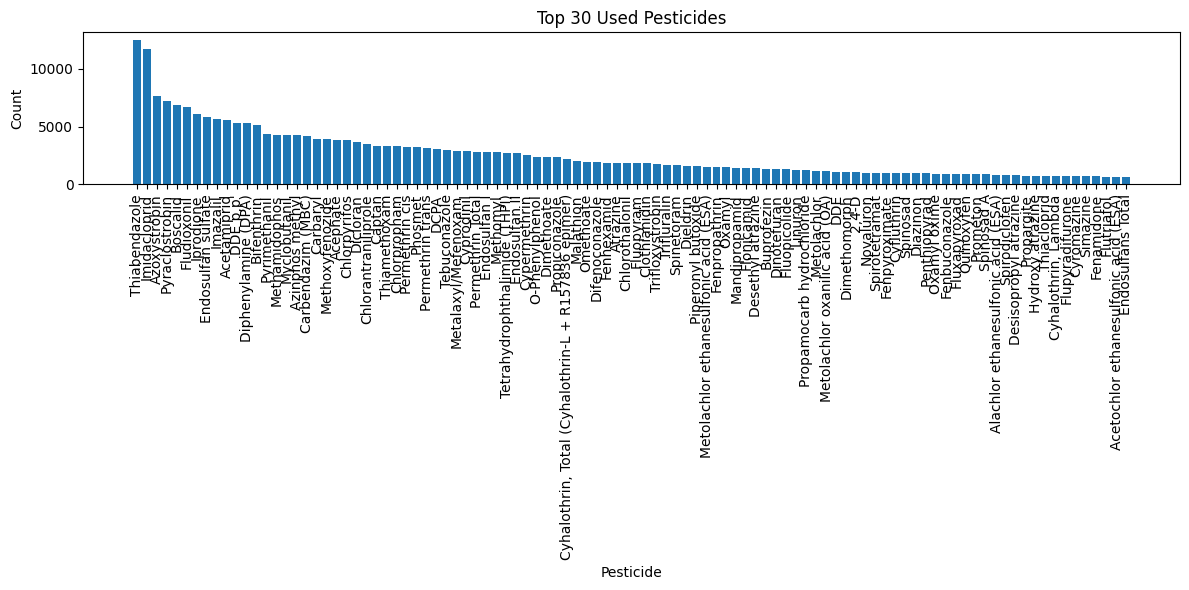

In [71]:
# prompt: Now I want to look at the top 30 used pesticides. Visualize it too.

import matplotlib.pyplot as plt
# Group by pesticide and count occurrences
pesticide_counts = new_data.groupby('Pesticide Name')['Pesticide Name'].count()

# Sort in descending order and get the top 30 pesticides
top_30_pesticides = pesticide_counts.sort_values(ascending=False).head(100)

# Print the list of top 30 pesticides
print(top_30_pesticides)

# Visualize the top 30 pesticides
plt.figure(figsize=(12, 6))
plt.bar(top_30_pesticides.index, top_30_pesticides.values)
plt.xlabel('Pesticide')
plt.ylabel('Count')
plt.title('Top 30 Used Pesticides')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


<ipython-input-73-ff110aad8174>:15: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



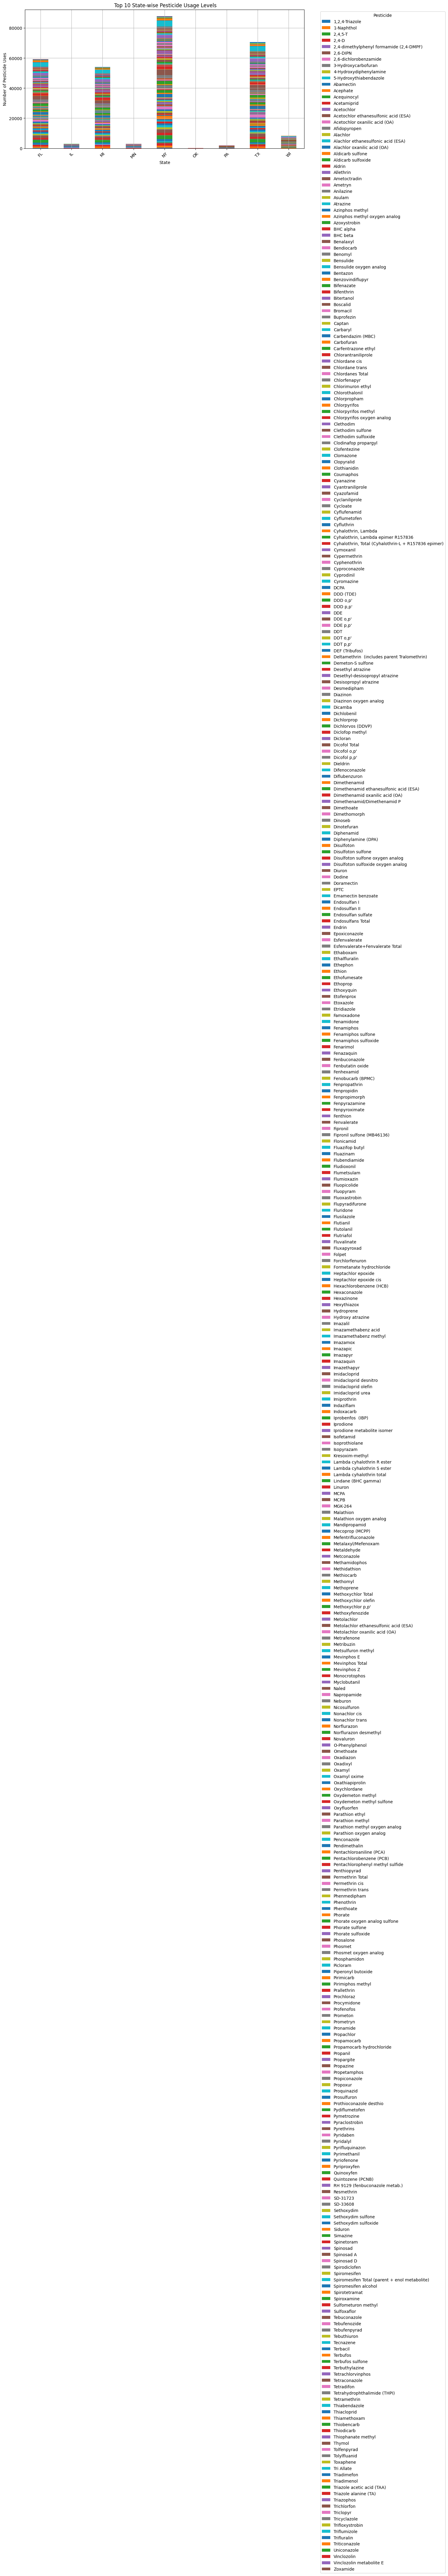

In [73]:
# prompt: ok now I want to look at top state wise usage levels. visualize it too.

import matplotlib.pyplot as plt
# Group by state and pesticide, then count occurrences
state_pesticide_counts = new_data.groupby(['State', 'Pesticide Name'])['Pesticide Name'].count().unstack().fillna(0)

# Plot the state-wise pesticide usage
ax = state_pesticide_counts.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title(' Top 10 State-wise Pesticide Usage Levels')
plt.xlabel('State')
plt.ylabel('Number of Pesticide Uses')
plt.legend(title='Pesticide', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [78]:
# prompt: i want to combine 5 csv files into one. I will input the paths of them individually. also i want to combine this into a dataframe. I have csv files and I want to add a year column to the dataframe. I will have csv files titled "/content/pesticide2017.csv" which should have a year value of 2017. I want the dataframe to be named data_pesticide.

import pandas as pd

# List of file paths and corresponding years
file_paths_and_years = [
    ('/content/pesticide2017.csv', 2017),
    ('/content/pesticide2018.csv', 2018),
    ('/content/pesticide2019.csv', 2019),
    ('/content/pesticide2020.csv', 2020),
    ('/content/pesticide2021.csv', 2021),
    ('/content/AnalyticalResults.csv', 2022),

]

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through the file paths and years
for file_path, year in file_paths_and_years:
  try:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    # Add a 'Year' column with the corresponding year
    df['Year'] = year
    # Append the DataFrame to the list
    dataframes.append(df)
  except FileNotFoundError:
    print(f"File not found: {file_path}")

# Concatenate all DataFrames into a single DataFrame
data_pesticide = pd.concat(dataframes, ignore_index=True)

# Display the resulting DataFrame
print(data_pesticide)


                 Sample ID Commod Pesticide Code       Pesticide Name  \
0       CA1701090142ACWA1P     AC            B75             Boscalid   
1       CA1701090142ACWA1P     AC            157        Thiabendazole   
2       CA1701090414ACWA1P     AC            125  Diphenylamine (DPA)   
3       CA1701090414ACWA1P     AC            B75             Boscalid   
4       CA1701090414ACWA1P     AC            B80          Acetamiprid   
...                    ...    ...            ...                  ...   
156344  NY2110190186GJOH1P     GJ            AGX        Mandipropamid   
156345  NY2110190280GJOH1P     GJ            AES      Methoxyfenozide   
156346   FL2109270040GJOH1     GJ            AKG            Fluopyram   
156347   FL2109270040GJOH1     GJ            AFM           Flutriafol   
156348   FL2109270040GJOH1     GJ            B48         Azoxystrobin   

       Test Class  Concentration     LOD pp_ Confirm 1  Confirm 2 Annotate  \
0               A         0.0050  0.0030   M 

In [79]:
pesticide_data_yearly = data_pesticide

In [80]:
pesticide_data_yearly

,Sample ID,Commod,Pesticide Code,Pesticide Name,Test Class,Concentration,LOD,pp_,Confirm 1,Confirm 2,Annotate,Quantitate,Mean,Extract,Determ,EPA Tolerance (ppm),Year
0,CA1701090142ACWA1P,AC,B75,Boscalid,A,0.0050,0.0030,M,LU,NaN,NaN,NaN,O,805,52,3.0,2017
1,CA1701090142ACWA1P,AC,157,Thiabendazole,B,0.1100,0.0020,M,LU,NaN,NaN,NaN,O,805,52,5.0,2017
2,CA1701090414ACWA1P,AC,125,Diphenylamine (DPA),F,0.0120,0.0020,M,GT,NaN,NaN,NaN,O,805,35,10.0,2017
3,CA1701090414ACWA1P,AC,B75,Boscalid,A,0.0110,0.0030,M,LU,NaN,NaN,NaN,O,805,52,3.0,2017
4,CA1701090414ACWA1P,AC,B80,Acetamiprid,A,0.0080,0.0015,M,LU,NaN,NaN,NaN,O,805,52,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156344,NY2110190186GJOH1P,GJ,AGX,Mandipropamid,N,0.0033,0.0020,M,LU,NaN,Q,NaN,O,805,52,1.4,2022
156345,NY2110190280GJOH1P,GJ,AES,Methoxyfenozide,I,0.0017,0.0010,M,LU,NaN,Q,NaN,O,805,52,1.0,2022
156346,FL2109270040GJOH1,GJ,AKG,Fluopyram,A,0.0037,0.0010,M,LU,NaN,NaN,NaN,O,805,52,2.0,2022
156347,FL2109270040GJOH1,GJ,AFM,Flutriafol,L,0.0033,0.0020,M,LU,NaN,Q,NaN,O,805,52,1.5,2022


In [109]:
pesticide_data_yearly['Sample ID'].unique()[1:50]

array(['CA1701090414ACWA1P', 'CA1701090449ACWA1', 'CA1701090521ACWA1',
       'CA1701090533ACWA1', 'CA1701090547ACWA1', 'CA1701090548ACWA1',
       'CA1701090554ACWA1', 'CA1701090606ACWA1', 'CA1701090630ACWA1P',
       'CA1701090638ACWA1P', 'CA1702130001ACWA1P', 'CA1702130004ACWA1P',
       'CA1702130414ACWA1P', 'CA1702130513ACWA1', 'CA1702130552ACWA1',
       'CA1702130553ACWA1P', 'CA1702130554ACWA1P', 'CA1702130556ACWA1',
       'CA1702130560ACWA1', 'CA1702130621ACWA1', 'CA1703130001ACWA1P',
       'CA1703130004ACWA1P', 'CA1703130151ACWA1P', 'CA1703130556ACWA1',
       'CA1703130557ACWA1', 'CA1703130599ACWA1', 'CA1703130627ACWA1P',
       'CA1704100151ACWA1P', 'CA1704100328ACWA1P', 'CA1704100414ACWA1P',
       'CA1704100490ACWA1', 'CA1704100557ACWA1', 'CA1704100559ACWA1',
       'CA1704100560ACWA1', 'CA1704100621ACWA1', 'CA1704100637ACWA1',
       'CA1704100638ACWA1P', 'CA1705080001ACWA1P', 'CA1705080004ACWA1P',
       'CA1705080152ACWA1P', 'CA1705080551ACWA1', 'CA1705080557ACWA1',
 

In [81]:
pdf = pesticide_data_yearly

In [83]:
pdf.isnull().sum()

,0
Sample ID,0
Commod,0
Pesticide Code,0
Pesticide Name,0
Test Class,0
Concentration,0
LOD,0
pp_,0
Confirm 1,0
Confirm 2,156349


In [86]:
# prompt: lets drop columns "Confirm 2", 'Annotate", and '129766'

columns_to_drop = ["Confirm 2", "Annotate", "Quantitate"]
pdf = pdf.drop(columns=columns_to_drop, errors='ignore')


In [87]:
pdf

,Sample ID,Commod,Pesticide Code,Pesticide Name,Test Class,Concentration,LOD,pp_,Confirm 1,Mean,Extract,Determ,EPA Tolerance (ppm),Year
0,CA1701090142ACWA1P,AC,B75,Boscalid,A,0.0050,0.0030,M,LU,O,805,52,3.0,2017
1,CA1701090142ACWA1P,AC,157,Thiabendazole,B,0.1100,0.0020,M,LU,O,805,52,5.0,2017
2,CA1701090414ACWA1P,AC,125,Diphenylamine (DPA),F,0.0120,0.0020,M,GT,O,805,35,10.0,2017
3,CA1701090414ACWA1P,AC,B75,Boscalid,A,0.0110,0.0030,M,LU,O,805,52,3.0,2017
4,CA1701090414ACWA1P,AC,B80,Acetamiprid,A,0.0080,0.0015,M,LU,O,805,52,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156344,NY2110190186GJOH1P,GJ,AGX,Mandipropamid,N,0.0033,0.0020,M,LU,O,805,52,1.4,2022
156345,NY2110190280GJOH1P,GJ,AES,Methoxyfenozide,I,0.0017,0.0010,M,LU,O,805,52,1.0,2022
156346,FL2109270040GJOH1,GJ,AKG,Fluopyram,A,0.0037,0.0010,M,LU,O,805,52,2.0,2022
156347,FL2109270040GJOH1,GJ,AFM,Flutriafol,L,0.0033,0.0020,M,LU,O,805,52,1.5,2022


In [91]:
# prompt: the first two words of the "Sample ID" column is the state that is corresponding to it. so i want a new column titled state which just gives me the first two letters

# Assuming 'pdf' is your DataFrame and 'Sample ID' is the column you want to extract from
pdf['State'] = pdf['Sample ID'].str[:2]

# Display the updated DataFrame with the new 'State' column
pdf


,Sample ID,Commod,Pesticide Code,Pesticide Name,Test Class,Concentration,LOD,pp_,Confirm 1,Mean,Extract,Determ,EPA Tolerance (ppm),Year,State
0,CA1701090142ACWA1P,AC,B75,Boscalid,A,0.0050,0.0030,M,LU,O,805,52,3.0,2017,CA
1,CA1701090142ACWA1P,AC,157,Thiabendazole,B,0.1100,0.0020,M,LU,O,805,52,5.0,2017,CA
2,CA1701090414ACWA1P,AC,125,Diphenylamine (DPA),F,0.0120,0.0020,M,GT,O,805,35,10.0,2017,CA
3,CA1701090414ACWA1P,AC,B75,Boscalid,A,0.0110,0.0030,M,LU,O,805,52,3.0,2017,CA
4,CA1701090414ACWA1P,AC,B80,Acetamiprid,A,0.0080,0.0015,M,LU,O,805,52,1.0,2017,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156344,NY2110190186GJOH1P,GJ,AGX,Mandipropamid,N,0.0033,0.0020,M,LU,O,805,52,1.4,2022,NY
156345,NY2110190280GJOH1P,GJ,AES,Methoxyfenozide,I,0.0017,0.0010,M,LU,O,805,52,1.0,2022,NY
156346,FL2109270040GJOH1,GJ,AKG,Fluopyram,A,0.0037,0.0010,M,LU,O,805,52,2.0,2022,FL
156347,FL2109270040GJOH1,GJ,AFM,Flutriafol,L,0.0033,0.0020,M,LU,O,805,52,1.5,2022,FL


In [101]:
pdf['State'].unique()

array(['CA', 'CO', 'FL', 'MD', 'MI', 'NC', 'NY', 'OH', 'TX', 'WA', 'MO'],
      dtype=object)

In [93]:
pdf.shape

(156349, 15)

In [98]:
# prompt: I just want to focus on these ten states. [TX    ON    OK    NY    MN    MI    PA    FL    IL    WI]. create a new dataframe called pdf_new for the top 10 states

top_10_states = ['TX', 'ON', 'OK', 'NY', 'MN', 'MI', 'PA', 'FL', 'IL', 'WI']
pdf_new = pdf[pdf['State'].isin(top_10_states)]


In [99]:
pdf_new

,Sample ID,Commod,Pesticide Code,Pesticide Name,Test Class,Concentration,LOD,pp_,Confirm 1,Mean,Extract,Determ,EPA Tolerance (ppm),Year,State
386,FL1701020040ACWA1P,AC,666,Carbendazim (MBC),B,0.0160,0.0010,M,LU,O,805,52,2.0,2017,FL
387,FL1701020040ACWA1P,AC,B80,Acetamiprid,A,0.0070,0.0015,M,LU,O,805,52,1.0,2017,FL
388,FL1701030038ACWA1A,AC,624,Tetrahydrophthalimide (THPI),A,0.0380,0.0100,M,GT,O,805,35,25.0,2017,FL
389,FL1701030038ACWA1A,AC,B80,Acetamiprid,A,0.0360,0.0015,M,LU,O,805,52,1.0,2017,FL
390,FL1701030038ACWA1A,AC,AHS,Flubendiamide,I,0.0070,0.0035,M,LU,O,805,52,1.5,2017,FL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156344,NY2110190186GJOH1P,GJ,AGX,Mandipropamid,N,0.0033,0.0020,M,LU,O,805,52,1.4,2022,NY
156345,NY2110190280GJOH1P,GJ,AES,Methoxyfenozide,I,0.0017,0.0010,M,LU,O,805,52,1.0,2022,NY
156346,FL2109270040GJOH1,GJ,AKG,Fluopyram,A,0.0037,0.0010,M,LU,O,805,52,2.0,2022,FL
156347,FL2109270040GJOH1,GJ,AFM,Flutriafol,L,0.0033,0.0020,M,LU,O,805,52,1.5,2022,FL


In [97]:
pdf_new['State'].unique()

array(['FL', 'MI', 'NY', 'TX'], dtype=object)

In [111]:
pdf_new.isnull().sum()

,0
Sample ID,0
Commod,0
Pesticide Code,0
Pesticide Name,0
Test Class,0
Concentration,0
LOD,0
pp_,0
Confirm 1,0
Mean,0


In [118]:
pdf_new.describe()

,Concentration,LOD,Determ,Year
count,80472.000000,80472.000000,80472.000000,80472.000000
mean,0.164809,0.009097,49.539604,2020.232777
std,1.937812,0.160857,11.675518,1.705672
min,0.001000,0.001000,35.000000,2017.000000
25%,0.005000,0.001300,35.000000,2019.000000
50%,0.014000,0.002500,52.000000,2021.000000
75%,0.049000,0.005000,52.000000,2022.000000
max,128.000000,6.800000,80.000000,2022.000000


In [116]:
# prompt: drop the rows in the dataframe which have missing values.

pdf_new_dropped = pdf_new.dropna()


In [117]:
pdf_new_dropped.describe()

,Concentration,LOD,Determ,Year
count,80427.000000,80427.000000,80427.000000,80427.000000
mean,0.127460,0.005298,49.531513,2020.234585
std,0.694481,0.008487,11.673771,1.704434
min,0.001000,0.001000,35.000000,2017.000000
25%,0.005000,0.001300,35.000000,2019.000000
50%,0.014000,0.002500,52.000000,2021.000000
75%,0.049000,0.005000,52.000000,2022.000000
max,105.000000,0.400000,80.000000,2022.000000


In [119]:
pdf_new_dropped.isnull().sum()

,0
Sample ID,0
Commod,0
Pesticide Code,0
Pesticide Name,0
Test Class,0
Concentration,0
LOD,0
pp_,0
Confirm 1,0
Mean,0


In [120]:
pdf1 = pdf_new_dropped

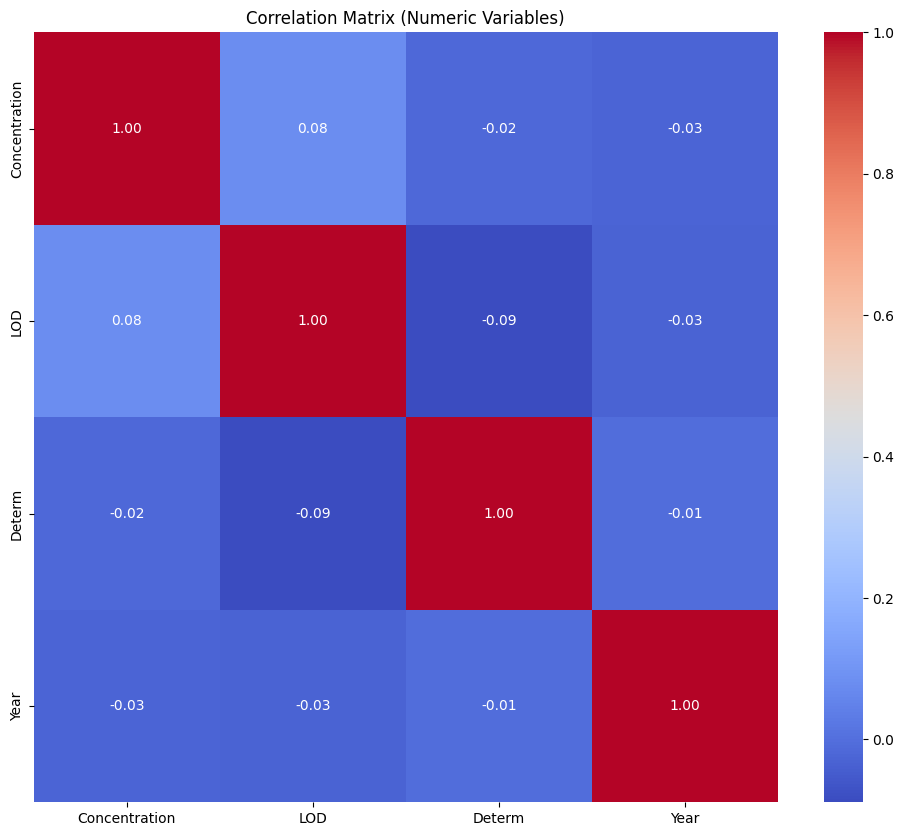

In [122]:
# prompt: make a correlation matrix to see the realtionship between numeric variables. make another one with all variables.

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Correlation matrix for numeric variables only
numeric_cols = pdf1.select_dtypes(include=np.number).columns
correlation_matrix_numeric = pdf1[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numeric Variables)')
plt.show()






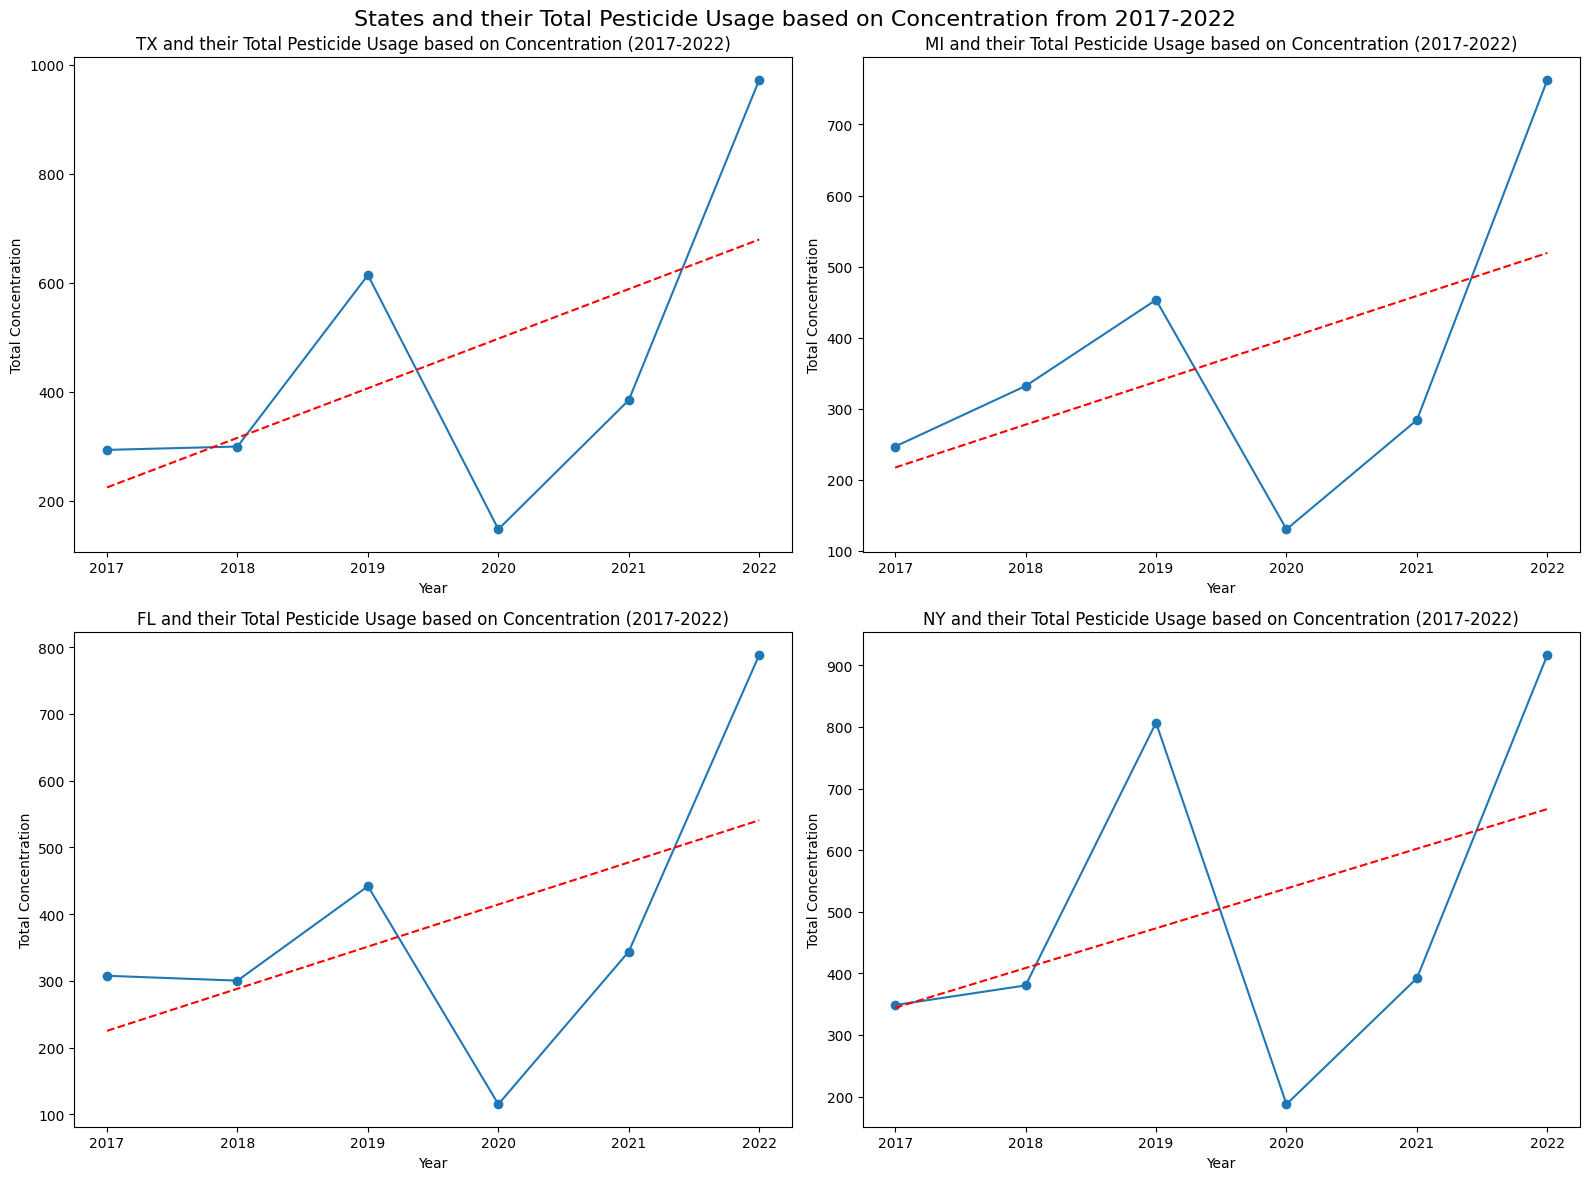

In [125]:
# prompt: now i want to see a rate of change in the "pdf1" dataframe of the 4 states state over 2017-2022 using a Line Plot with Slopes. one chart per state.  Give it a label too. "States and thier total pesticide usage based on Concentration". I want to use concentration now.

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'pdf1' is your DataFrame and it has 'State', 'Year', and 'Concentration' columns

# List of top 4 states to visualize
top_4_states = ['TX', 'MI', 'FL', 'NY']

# Create a figure with subplots for each state
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten()

for state, ax in zip(top_4_states, axes):
  # Filter data for the current state
  df_state = pdf1[pdf1['State'] == state]

  # Group by year and calculate the total pesticide usage based on concentration
  year_concentration_sum = df_state.groupby('Year')['Concentration'].sum()

  # Create the line plot
  ax.plot(year_concentration_sum.index, year_concentration_sum.values, marker='o')

  # Calculate and plot the slope
  x = np.array(year_concentration_sum.index)
  y = np.array(year_concentration_sum.values)
  slope, intercept = np.polyfit(x, y, 1)
  ax.plot(x, slope * x + intercept, linestyle='--', color='red')

  ax.set_title(f'{state} and their Total Pesticide Usage based on Concentration (2017-2022)')
  ax.set_xlabel('Year')
  ax.set_ylabel('Total Concentration')

# Add a title for the entire figure
fig.suptitle('States and their Total Pesticide Usage based on Concentration from 2017-2022', fontsize=16)

plt.tight_layout()  # Prevent overlapping
plt.show()


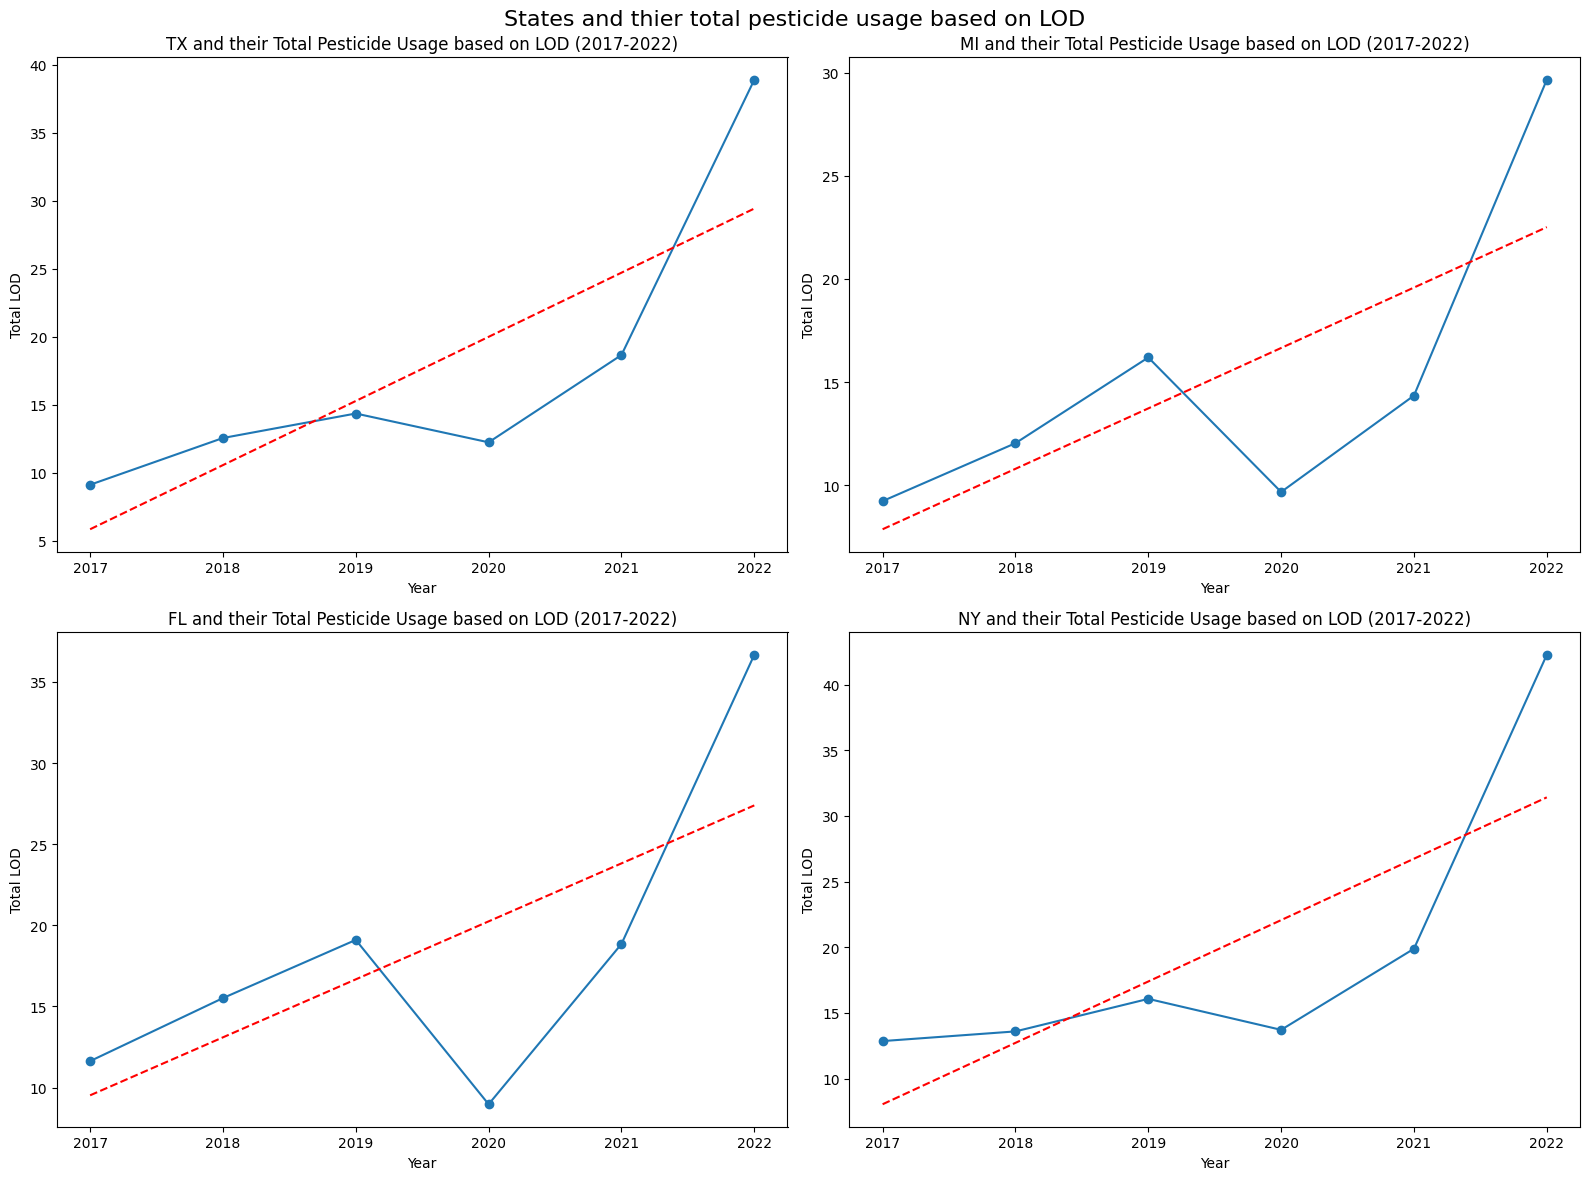

In [126]:
# prompt: now i want to see a rate of change in the "pdf1" dataframe of the 4 states state over 2017-2022 using a Line Plot with Slopes. one chart per state.  Give it a label too. "States and thier total pesticide usage based on LOD". I want to use LOD now.

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'pdf1' is your DataFrame and it has 'State', 'Year', and 'LOD' columns

# List of top 4 states to visualize
top_4_states = ['TX', 'MI', 'FL', 'NY']

# Create a figure with subplots for each state
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten()

for state, ax in zip(top_4_states, axes):
    # Filter data for the current state
    df_state = pdf1[pdf1['State'] == state]

    # Group by year and calculate the total pesticide usage based on LOD
    year_lod_sum = df_state.groupby('Year')['LOD'].sum()

    # Create the line plot
    ax.plot(year_lod_sum.index, year_lod_sum.values, marker='o')

    # Calculate and plot the slope
    x = np.array(year_lod_sum.index)
    y = np.array(year_lod_sum.values)
    slope, intercept = np.polyfit(x, y, 1)
    ax.plot(x, slope * x + intercept, linestyle='--', color='red')

    ax.set_title(f'{state} and their Total Pesticide Usage based on LOD (2017-2022)')
    ax.set_xlabel('Year')
    ax.set_ylabel('Total LOD')

# Add a title for the entire figure
fig.suptitle('States and thier total pesticide usage based on LOD', fontsize=16)

plt.tight_layout()  # Prevent overlapping
plt.show()


In [127]:
pdf1

,Sample ID,Commod,Pesticide Code,Pesticide Name,Test Class,Concentration,LOD,pp_,Confirm 1,Mean,Extract,Determ,EPA Tolerance (ppm),Year,State
386,FL1701020040ACWA1P,AC,666,Carbendazim (MBC),B,0.0160,0.0010,M,LU,O,805,52,2.0,2017,FL
387,FL1701020040ACWA1P,AC,B80,Acetamiprid,A,0.0070,0.0015,M,LU,O,805,52,1.0,2017,FL
388,FL1701030038ACWA1A,AC,624,Tetrahydrophthalimide (THPI),A,0.0380,0.0100,M,GT,O,805,35,25.0,2017,FL
389,FL1701030038ACWA1A,AC,B80,Acetamiprid,A,0.0360,0.0015,M,LU,O,805,52,1.0,2017,FL
390,FL1701030038ACWA1A,AC,AHS,Flubendiamide,I,0.0070,0.0035,M,LU,O,805,52,1.5,2017,FL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156344,NY2110190186GJOH1P,GJ,AGX,Mandipropamid,N,0.0033,0.0020,M,LU,O,805,52,1.4,2022,NY
156345,NY2110190280GJOH1P,GJ,AES,Methoxyfenozide,I,0.0017,0.0010,M,LU,O,805,52,1.0,2022,NY
156346,FL2109270040GJOH1,GJ,AKG,Fluopyram,A,0.0037,0.0010,M,LU,O,805,52,2.0,2022,FL
156347,FL2109270040GJOH1,GJ,AFM,Flutriafol,L,0.0033,0.0020,M,LU,O,805,52,1.5,2022,FL


In [128]:
# prompt: i want to filter the "df_top_10_states" dataframe to contain only 4 states which are : 'TX', 'MI', 'FL', 'NY' and I want the data between 2017 and 2022 only. The new df is called "df_4".

df_4 = df_top_10_states[(df_top_10_states['State/Province'].isin(['TX', 'MI', 'FL', 'NY'])) &
                         (df_top_10_states['Date'].dt.year >= 2017) &
                         (df_top_10_states['Date'].dt.year <= 2022)]



In [131]:
df_4['State/Province'].unique()

array(['TX', 'FL', 'MI', 'NY'], dtype=object)

In [132]:
# prompt: Rename the "State/Province" to a new column called "State"

df_4 = df_4.rename(columns={"State/Province": "State"})


In [133]:
df_top_10_states.shape

(58406, 7)

In [134]:
df_4.shape

(23230, 7)

In [137]:
df_4.describe()

,Date,Latitude,Longitude,seasonal,Year
count,23230,23230.000000,23230.000000,23230.000000,23230.000000
mean,2020-06-05 09:05:48.687042304,34.505196,-88.779531,0.295867,2019.794361
min,2017-01-01 00:00:00,19.600000,-106.600000,0.000000,2017.000000
25%,2018-10-14 00:00:00,29.800000,-97.100000,0.000000,2018.000000
50%,2020-10-02 00:00:00,32.200000,-94.000000,0.000000,2020.000000
75%,2021-11-22 00:00:00,42.100000,-81.700000,1.000000,2021.000000
max,2022-12-31 00:00:00,48.100000,-71.900000,1.000000,2022.000000
std,NaN,6.158878,9.061572,0.456442,1.700036


In [135]:
df_4.columns

Index(['Date', 'Town', 'State', 'Latitude', 'Longitude', 'seasonal', 'Year'], dtype='object')

In [136]:
pdf1.columns

Index(['Sample ID', 'Commod', 'Pesticide Code', 'Pesticide Name', 'Test Class',
       'Concentration', 'LOD', 'pp_', 'Confirm 1', 'Mean', 'Extract', 'Determ',
       'EPA Tolerance (ppm)', 'Year', 'State'],
      dtype='object')

## AQI Analysis
